In [ ]:
#Updated ipython
!pip install --upgrade ipython
#Install nb-black
!pip install nb-black 

     |████████████████████████████████| 793 kB 12.6 MB/s 
     |████████████████████████████████| 381 kB 41.1 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


     |████████████████████████████████| 1.4 MB 31.0 MB/s 
     |████████████████████████████████| 96 kB 5.2 MB/s 
     |████████████████████████████████| 843 kB 37.4 MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5297 sha256=16462c042911d953f21cb5d7274ec50edd0c3d27191a2df483d3e8fa70c8dc49
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
#Import NumPy
import numpy as np

#Import Pandas
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

#Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Import Seaborn
import seaborn as sns

#Import sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

#Beautify Python code
%reload_ext nb_black

#Import warnings
import warnings
warnings.filterwarnings("ignore")

#Import Metrics
from sklearn import metrics

<IPython.core.display.Javascript object>

In [ ]:
#mount and connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Import dataset "used_cars_data.csv"
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Loan_Modelling.csv')

Mounted at /content/drive


<IPython.core.display.Javascript object>

## **Data Preprocessing, EDA, and Univariate/Multivariate Analysis**

In [ ]:
#Return random data sample
data.sample(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2956  2957   62          38     195    91125       4    5.2          3   
4317  4318   58          33      60    92672       4    1.3          3   
2514  2515   41          16      25    92182       2    0.1          2   
1477  1478   40          14      64    91320       4    0.2          3   
965    966   62          36     135    94301       2    5.2          2   
373    374   49          25      20    90291       4    1.0          1   
586    587   39          14     101    94305       2    0.4          1   
1185  1186   43          19      31    94025       3    0.5          1   
2139  2140   57          32     113    91768       1    0.1          3   
1171  1172   64          40      43    95014       1    1.9          2   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2956       522              1                   0           1       1   
4317         0              0                   0           0       1   
2514        91              0                   1           0       0   
1477         0              0                   0           0       1   
965          0              1                   0           0       1   
373        111              0                   0           0       1   
586          0              0                   0           0       1   
1185         0              0                   0           0       0   
2139         0              0                   0           0       1   
1171         0              0                   0           0       1   

      CreditCard  
2956           1  
4317           0  
2514           0  
1477           1  
965            0  
373            1  
586            1  
1185           0  
2139           0  
1171           0

<IPython.core.display.Javascript object>

In [ ]:
#Data shape
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

In [ ]:
#Number of rows and columns
print(f'Number of rows: {data.shape[0]} and Number of columns: {data.shape[1]}')

Number of rows: 5000 and Number of columns: 14


<IPython.core.display.Javascript object>

In [ ]:
#Data type review
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

There are (13) int64 datatypes and (1) float64 dataypes. There also does not appear to be any missing values in the dataset. We will confirm below.

In [ ]:
#Confirming no data is missing
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

Confirmed there are no missing values in the dataset.

In [ ]:
#Check for duplicates
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

There is no duplicated data identified. Additionally, the ID column does not offer any added value so we will drop this column.

In [ ]:
#Drop ID column
data.drop(['ID'], axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [ ]:
#Statistical summary of dataset
data.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

<IPython.core.display.Javascript object>

**Age**

*   Mean: 45.3
*   Minimum Age: 23
*   Maximum Age: 67

**Experience**

*   Mean: 20.1
*   Minimum Experience: -3
*   Maximum Experience: 43

(We will address the negative values below)

**Income**

*   Mean: 73.8
*   Minimum Income: 8
*   Maximum Income: 224

**Family**

*   Mean: 2.4
*   Minimum Family: 1
*   Maximum Family: 4

**CC Avg**

*   Mean: 1.9
*   Minimum CC Avg: 0
*   Maximum CC Avg: 10

**Education**

*   Mean: 1.9
*   Minimum Education: 1
*   Maximum Age: 3

**Mortgage**

*   Mean: 56.5
*   Minimum Mortgage: 0
*   Maximum Mortgage: 635

In [ ]:
#Review unique values
pd.DataFrame(data.nunique())

0
Age                  45
Experience           47
Income              162
ZIPCode             467
Family                4
CCAvg               108
Education             3
Mortgage            347
Personal_Loan         2
Securities_Account    2
CD_Account            2
Online                2
CreditCard            2

<IPython.core.display.Javascript object>

Zip codes seem to have the most unique values. Since we are dealing with logistic regression which does classifications based on categories, we will want to convert the zip codes into something we can categorize. Since city would most likely return the same number of unique values, we will convert the zip codes to be based on county. This is a mush more macro approach and should reduce the number of unique values in the dataset. This is also a much better approach as all of the zip codes appear to be located in the same state so using the state instead of zip code would not offer much value.

Doing a simple Google search returned a GitHub repo that utilizes a Python library called zipcode (https://github.com/buckmaxwell/zipcode) that has the ability to map zip codes to specific counties.

In [ ]:
#Install the Python zipcode library
!pip install zipcodes

     |████████████████████████████████| 719 kB 27.3 MB/s 


<IPython.core.display.Javascript object>

We will first create a list of all the unique values for ZIPCode which will enable us to create an iterative for loop. We will then store these in a dictionary as Zip Code mapped to the county. We will convert the stored values to a string. If the county conversion cannot be identified, we will simply keep the zip code and evaluate the results.

In [ ]:
#Import the zipcodes Python package
import zipcodes

#Create a list of the zip codes in the dataset based on these unique values
zip_list = data.ZIPCode.unique()

zipcode_dictionary = {}
for zip in zip_list:
    zip_to_county = zipcodes.matching(zip.astype('str'))
    if len(zip_to_county)==1:
        #Get the county from the zipcodes package
        county = zip_to_county[0].get('county')
    else:
        county = zip
    
    zipcode_dictionary.update({zip:county})
#Return the dictionary
zipcode_dictionary

{90005: 'Los Angeles County',
 90007: 'Los Angeles County',
 90009: 'Los Angeles County',
 90011: 'Los Angeles County',
 90016: 'Los Angeles County',
 90018: 'Los Angeles County',
 90019: 'Los Angeles County',
 90024: 'Los Angeles County',
 90025: 'Los Angeles County',
 90027: 'Los Angeles County',
 90028: 'Los Angeles County',
 90029: 'Los Angeles County',
 90032: 'Los Angeles County',
 90033: 'Los Angeles County',
 90034: 'Los Angeles County',
 90035: 'Los Angeles County',
 90036: 'Los Angeles County',
 90037: 'Los Angeles County',
 90041: 'Los Angeles County',
 90044: 'Los Angeles County',
 90045: 'Los Angeles County',
 90048: 'Los Angeles County',
 90049: 'Los Angeles County',
 90057: 'Los Angeles County',
 90058: 'Los Angeles County',
 90059: 'Los Angeles County',
 90064: 'Los Angeles County',
 90065: 'Los Angeles County',
 90066: 'Los Angeles County',
 90068: 'Los Angeles County',
 90071: 'Los Angeles County',
 90073: 'Los Angeles County',
 90086: 'Los Angeles County',
 90089: 'L

<IPython.core.display.Javascript object>

The following zip codes were not mapped to the county:

*   92634
*   92717
*   93077
*   96651

We will drop these rows.

In [ ]:
#Drop all rows with 92634 zip code
data = data[data["ZIPCode"] != 92634]

<IPython.core.display.Javascript object>

In [ ]:
#Drop all rows with 92717 zip code
data = data[data["ZIPCode"] != 92717]

<IPython.core.display.Javascript object>

In [ ]:
#Drop all rows with 93077 zip code
data = data[data["ZIPCode"] != 93077]

<IPython.core.display.Javascript object>

In [ ]:
#Drop all rows with 96651 zip code
data = data[data["ZIPCode"] != 96651]

<IPython.core.display.Javascript object>

In [ ]:
data.shape

(4966, 13)

<IPython.core.display.Javascript object>

The data shape has now been reduced by (1) column after dropping the ID column and (44) rows by eliminating zip codes that could not be mapped to a county. We now need to map these counties to the dataset by using the map function. According to https://www.geeksforgeeks.org/python-map-function/, the map function *\"returns a list of the results after applying the given function to each item of a given iterable."*

In [ ]:
#Create new column county that maps the zip codes accordingly
data['County'] = data['ZIPCode'].map(zipcode_dictionary)

<IPython.core.display.Javascript object>

In [ ]:
#Review unique values
data[["County"]].nunique()

County    38
dtype: int64

<IPython.core.display.Javascript object>

We now only have 38 values instead of 467 which makes this much more manageable for EDA.

We will now convert the newly created county column to a categorical datatype.

In [ ]:
#Convert the county column to a category
data['County'].astype('category')

0         Los Angeles County
1         Los Angeles County
2             Alameda County
3       San Francisco County
4         Los Angeles County
                ...         
4995           Orange County
4996        San Diego County
4997          Ventura County
4998      Los Angeles County
4999           Orange County
Name: County, Length: 4966, dtype: category
Categories (38, object): ['Alameda County', 'Butte County', 'Contra Costa County', 'El Dorado County',
                          ..., 'Trinity County', 'Tuolumne County', 'Ventura County',
                          'Yolo County']

<IPython.core.display.Javascript object>

Let's check the breakdown by county.

In [ ]:
#Value counts by county
data['County'].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou County              7
Tuolumne

<IPython.core.display.Javascript object>

The top five counties where customers reside are as follows:

* Los Angeles County:       1095
* San Diego County:           568
* Santa Clara County:        563
* Alameda County:             500
* Orange County:            339

We noticed above that there were some negative values in the experience column above that we need to address. We can do a number of things here. We can impute using a neasure of central tendency, we could drop the rows, we can replace these with zeros, or we can use the absolute value funtion. Let's first understand the impact before we determine which strategy would be best.

In [ ]:
#Identify all the rows with negative values for expereience
data[data['Experience'] < 0].value_counts().sum()

51

<IPython.core.display.Javascript object>

There are 51 rows with negative values for the experience column. Since it is impossible to have a negative number of years of experience and we do not know if this was a clerical error, we are going to replace those values with zeros. We caoul also use the absolute value, but I chose to make them 0.

In [ ]:
#Replace negative values with zeros
data.loc[data['Experience']<0,'Experience'] = 0

<IPython.core.display.Javascript object>

In [ ]:
#Confirm values have been changed
data[data['Experience'] < 0].value_counts().sum()

0

<IPython.core.display.Javascript object>

We will now review the value counts for experience.

In [ ]:
#Value counts by experience
data['Experience'].value_counts().sort_values(ascending=False)

32    153
9     147
20    146
5     145
23    144
35    143
25    141
28    138
19    135
18    135
26    133
3     129
24    128
16    127
30    126
14    126
22    124
29    124
34    123
27    123
17    123
15    119
7     119
6     118
8     118
33    117
10    117
0     116
37    116
11    115
13    115
21    113
36    112
4     112
31    104
12    101
38     88
2      85
39     85
1      73
40     56
41     43
42      8
43      3
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

Breakdown of years of experience by count:

* 32:    153
* 9:     147
* 20:   146
* 5:     145
* 23:    144

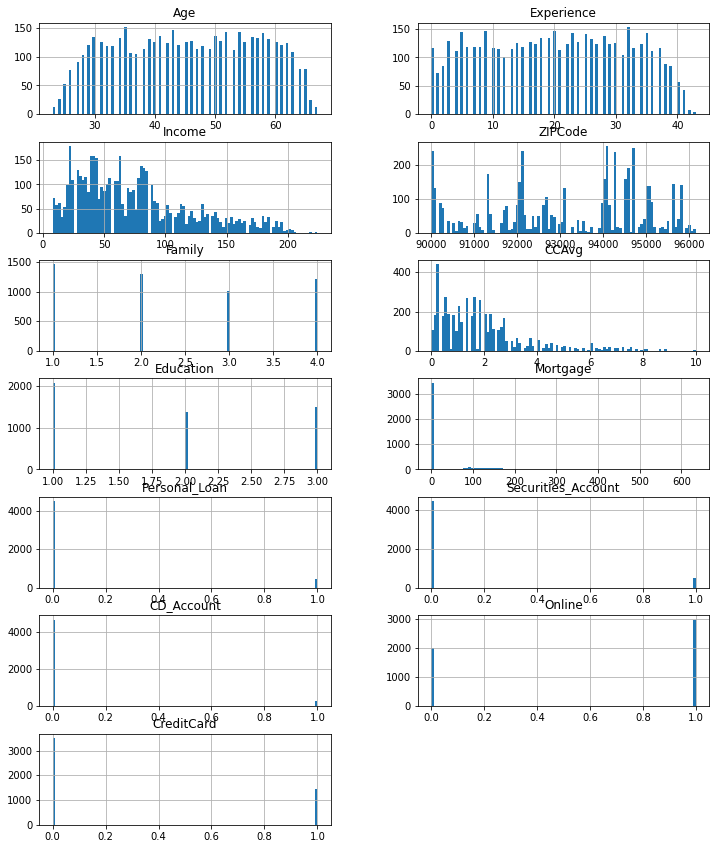

<IPython.core.display.Javascript object>

In [ ]:
#View the continuous data 
columns = list(data)[0:-1]
data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

In [ ]:
#Create a function for univariate analysis (code used from Class Module)
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    ) 
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    ) 

<IPython.core.display.Javascript object>

In [ ]:
#Create function for outlier identification
def feature_outliers(feature: str, data = data):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

<IPython.core.display.Javascript object>

**Age Analysis**

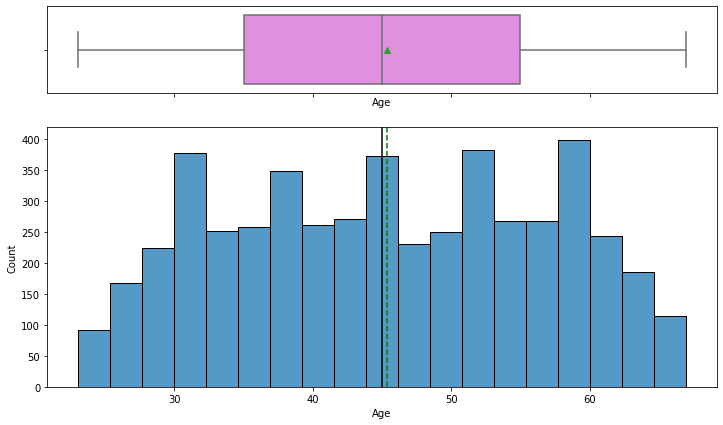

<IPython.core.display.Javascript object>

In [ ]:
#Histogram/Boxplot for age analysis
histogram_boxplot(data, "Age")

The age feature looks relatively normal and even.

In [ ]:
#Mean of age
print(data['Age'].mean())

45.35380587998389


<IPython.core.display.Javascript object>

In [ ]:
#Median of age
print(data['Age'].median())

45.0


<IPython.core.display.Javascript object>

Mean and median both around 45 years old.

In [ ]:
#Evaluate outliers
age_outliers = feature_outliers('Age')
age_outliers.sort_values(by = 'Age', ascending = False)
age_outliers

Empty DataFrame
Columns: [Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard, County]
Index: []

<IPython.core.display.Javascript object>

There do not appear to be any outliers for the age feature. We will create a binned column for age and convert this to categorical datatype. This will be used for EDA purposed for multivariate analysis.

In [ ]:
#Bin ages
data['Age_Binned'] = pd.cut(data['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

<IPython.core.display.Javascript object>

**Education Analysis**

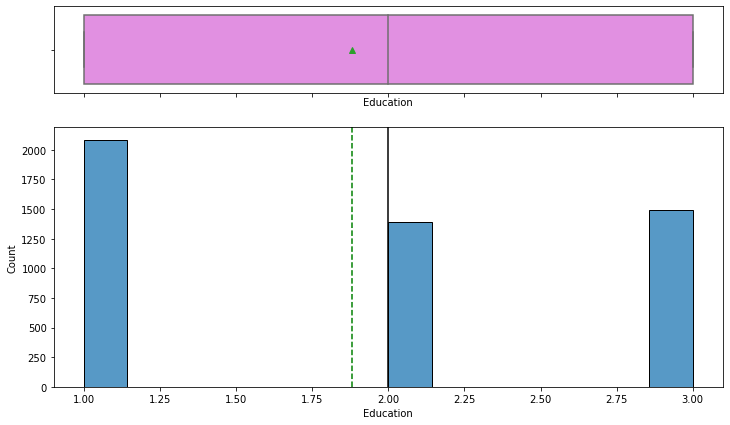

<IPython.core.display.Javascript object>

In [ ]:
#Histogram/Boxplot of experience analysis
histogram_boxplot(data, "Education")

In [ ]:
#Mean of education
print(data['Education'].mean())

1.8803866290777285


<IPython.core.display.Javascript object>

In [ ]:
#Median of education
print(data['Education'].median())

2.0


<IPython.core.display.Javascript object>

The mean education is 1.9 and the median is 2.0. We will convert the education feature to a categorical datatype.

In [ ]:
#Convert Education columns to category
data['Education'] = data['Education'].astype('category', errors = 'raise')

<IPython.core.display.Javascript object>

**Experience Analysis**

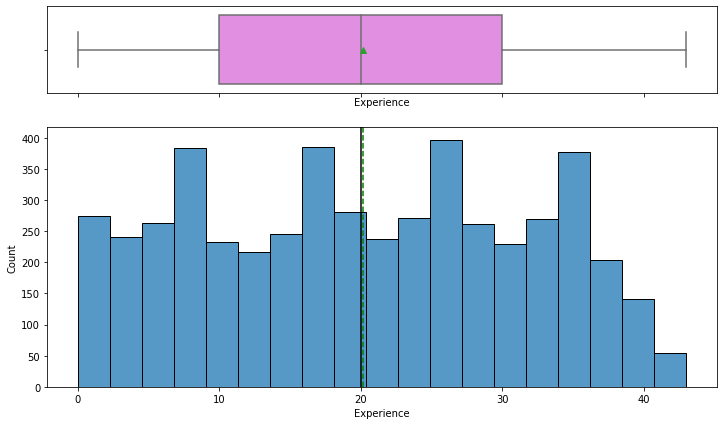

<IPython.core.display.Javascript object>

In [ ]:
#Histogram/Boxplot of experience analysis
histogram_boxplot(data, "Experience")

In [ ]:
#Mean of experience
print(data['Experience'].mean())

20.134514699959727


<IPython.core.display.Javascript object>

In [ ]:
#Median of experience
print(data['Experience'].median())

20.0


<IPython.core.display.Javascript object>

The mean experience is 20.1 and the median is 20. This data looks relatively normal.

In [ ]:
#Evaluate outliers
experience_outliers = feature_outliers('Experience')
experience_outliers.sort_values(by = 'Experience', ascending = False)
experience_outliers

Empty DataFrame
Columns: [Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard, County, Age_Binned]
Index: []

<IPython.core.display.Javascript object>

There do not appear to be any outliers for the experience feature.

**Income Analysis**

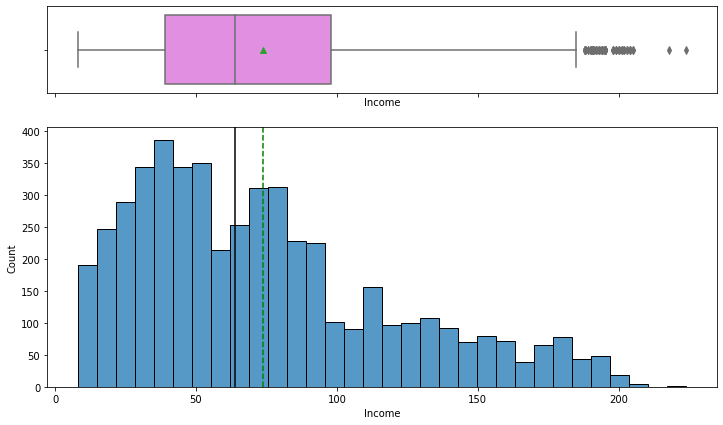

<IPython.core.display.Javascript object>

In [ ]:
#Histogram/Boxplot of income analysis
histogram_boxplot(data, "Income")

In [ ]:
#Mean of income
print(data['Income'].mean())

73.82782923882401


<IPython.core.display.Javascript object>

In [ ]:
#Mean of income
print(data['Income'].median())

64.0


<IPython.core.display.Javascript object>

The data for the income feature is right skewed.There is approximately $10,000 difference between the mean and median income.

In [ ]:
#Evaluate outliers
income_outliers = feature_outliers('Income')
income_outliers.sort_values(by = 'Income', ascending = False)
income_outliers.head()
income_outliers.value_counts().sum()

96

<IPython.core.display.Javascript object>

There are 96 outliers for the income feature. We will not change these as these customers may be in the market for a personal loan.

**Mortgage Analysis**

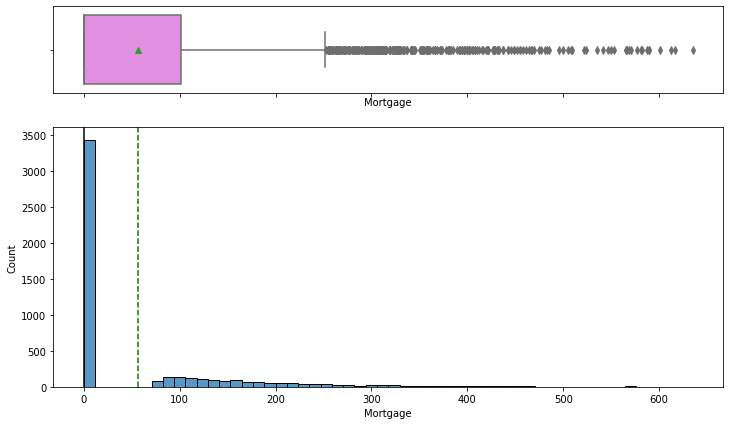

<IPython.core.display.Javascript object>

In [ ]:
#Histogram/Boxplot of income analysis
histogram_boxplot(data, "Mortgage")

In [ ]:
#Check the number of rows 
data[data['Mortgage'] == 0].value_counts().sum()

3435

<IPython.core.display.Javascript object>

There are 3,435 customers in the dataset that do not report having a mortgage.

In [ ]:
#Mean of mortgage
print(data['Mortgage'].mean())

56.66874748288361


<IPython.core.display.Javascript object>

In [ ]:
#Median of mortgage
print(data['Mortgage'].median())

0.0


<IPython.core.display.Javascript object>

Approximately 69% of customers do not report having a mortgage.

In [ ]:
#Evaluate outliers
mortgage_outliers = feature_outliers('Mortgage')
mortgage_outliers.sort_values(by = 'Mortgage', ascending = False)
mortgage_outliers.head()
mortgage_outliers.value_counts().sum()

289

<IPython.core.display.Javascript object>

There are 289 outliers for the mortgage feature. Again, we will leave these as is.

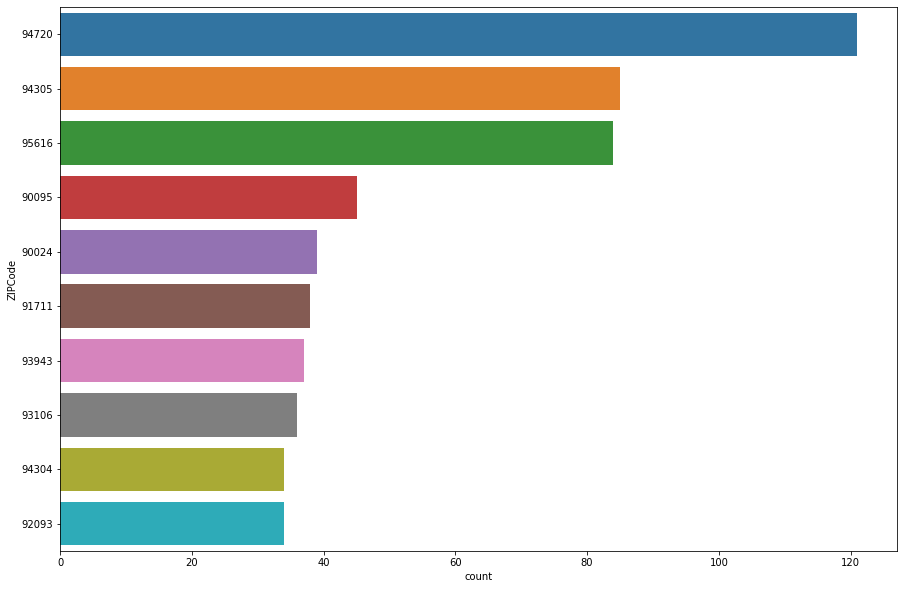

<IPython.core.display.Javascript object>

In [ ]:
#Top 10 customers by Zip code with no mortgage
plt.figure(figsize=(15, 10))
sns.countplot(y = data[data.Mortgage==0]['ZIPCode'], data = data, order = data[data.Mortgage == 0]['ZIPCode'].value_counts().index[:10]);

**CC Avg Analysis**

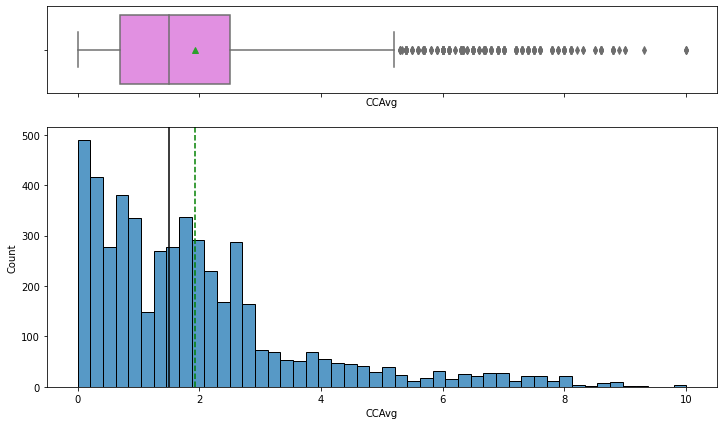

<IPython.core.display.Javascript object>

In [ ]:
#Histogram/Boxplot of CCAvg analysis
histogram_boxplot(data, "CCAvg")

In [ ]:
#Mean of CCAvg
print(data['CCAvg'].mean())

1.9370157068062888


<IPython.core.display.Javascript object>

In [ ]:
#Mean of CCAvg
print(data['CCAvg'].median())

1.5


<IPython.core.display.Javascript object>

The mean CCAvg is 1.9 and the median is 1.5

In [ ]:
#Evaluate outliers
ccavg_outliers = feature_outliers('CCAvg')
ccavg_outliers.sort_values(by = 'CCAvg', ascending = False)
ccavg_outliers.head()
ccavg_outliers.value_counts().sum()

320

<IPython.core.display.Javascript object>

There are 320 outliers identified for the CCAvg feature. We will leave this as some customers may apply for personal loans for debt consolidation.

**Family Analysis**

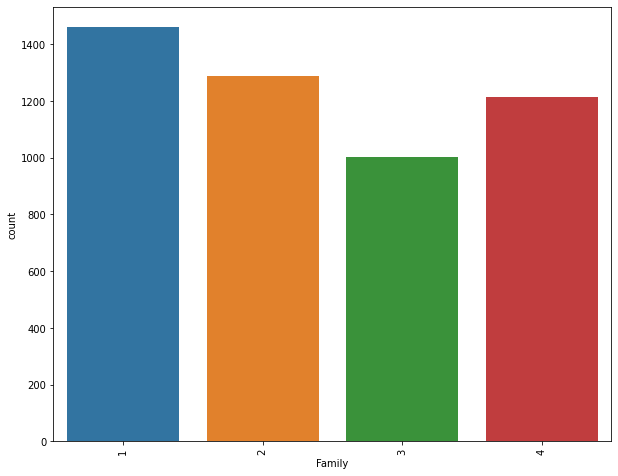

<IPython.core.display.Javascript object>

In [ ]:
#Countplot of the family column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Family', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [ ]:
#Mean of family
print(data['Family'].mean())

2.397100281917036


<IPython.core.display.Javascript object>

In [ ]:
#Median of experience
print(data['Family'].median())

2.0


<IPython.core.display.Javascript object>

The mean family size is 2.4 and the median is 2.0

We will convert the family column to a categorical datatype.

In [ ]:
#Convert family columns to category
data['Family'].astype('category', errors = 'raise')

0       4
1       3
2       1
3       1
4       4
       ..
4995    1
4996    4
4997    2
4998    3
4999    3
Name: Family, Length: 4966, dtype: category
Categories (4, int64): [1, 2, 3, 4]

<IPython.core.display.Javascript object>

**County Analysis**

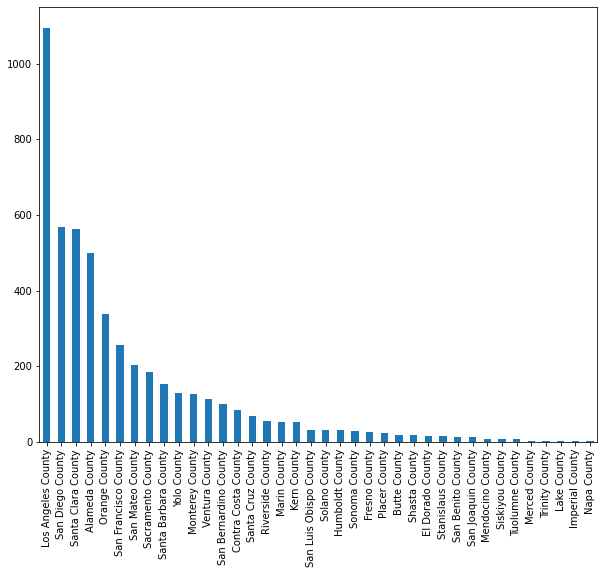

<IPython.core.display.Javascript object>

In [ ]:
#Barplot of county
plt.figure(figsize = (10,8))
data['County'].value_counts().plot(kind="bar")
plt.show()

The top three counties are:

*   Los Angeles County
*   San Diego County
*   Santa Clara County

We will convert this column to a categorical datatype and drop the Zip Code column.



In [ ]:
#Convert County columns to category
data['County'] = data['County'].astype('category', errors = 'raise')

<IPython.core.display.Javascript object>

We will use the newly create county column and drop the ZIPCode feature.

In [ ]:
#Drop ZIPCode column
data.drop(['ZIPCode'], axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

**Personal Loan Analysis**

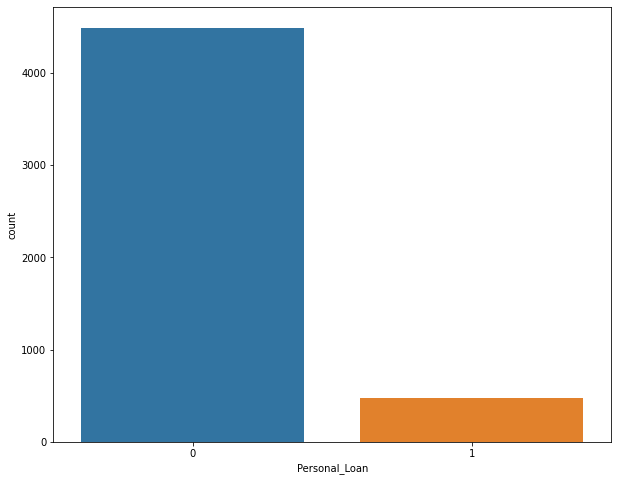

<IPython.core.display.Javascript object>

In [ ]:
#Countplot of the personal loan column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Personal_Loan', data = data)
ax.set_xticklabels(ax.get_xticklabels());

In [ ]:
#Percentage of customers with personal loans
percentage = pd.DataFrame(data['Personal_Loan'].value_counts(ascending=False))
took_personal_loan = (percentage.loc[1]/percentage.loc[0] * 100).round(2)
print(f'{took_personal_loan[0]}% of customers have a personal loan.')

10.63% of customers have a personal loan.


<IPython.core.display.Javascript object>

**Online Customers Analysis**

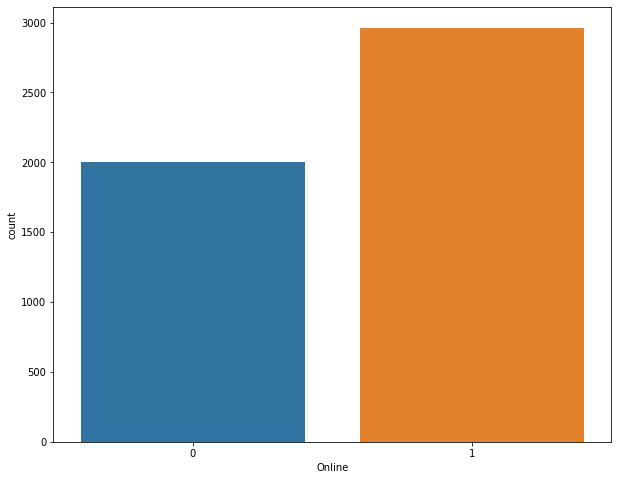

<IPython.core.display.Javascript object>

In [ ]:
#Countplot of the online column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Online', data = data)
ax.set_xticklabels(ax.get_xticklabels());

In [ ]:
#Percentage of customers of customers using online
percentage = pd.DataFrame(data['Online'].value_counts(ascending=False))
online = (percentage.loc[0]/percentage.loc[1] * 100).round(2)
print(f'{online[0]}% of customers use online banking.')

67.54% of customers use online banking.


<IPython.core.display.Javascript object>

We will convert the Online feature to a categorical datatype.

In [ ]:
#Convert Online columns to category
data['Online'] = data['Online'].astype('category', errors = 'raise')

<IPython.core.display.Javascript object>

**Securities Account Analysis**

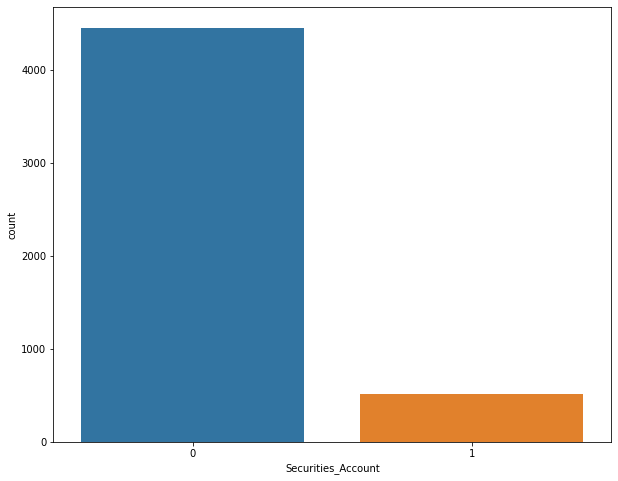

<IPython.core.display.Javascript object>

In [ ]:
#Countplot of the securities account column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Securities_Account', data = data)
ax.set_xticklabels(ax.get_xticklabels());

In [ ]:
#Percentage of customers that have security accounts
percentage = pd.DataFrame(data['Securities_Account'].value_counts(ascending=False))
online = (percentage.loc[1]/percentage.loc[0] * 100).round(2)
print(f'{online[0]}% of customers have security accounts.')

11.62% of customers have security accounts.


<IPython.core.display.Javascript object>

We will convert the security accounts to a categorical datatype.

In [ ]:
#Convert Securities_Account columns to category
data['Securities_Account'] = data['Securities_Account'].astype('category', errors = 'raise')

<IPython.core.display.Javascript object>

**CD Account Analysis**

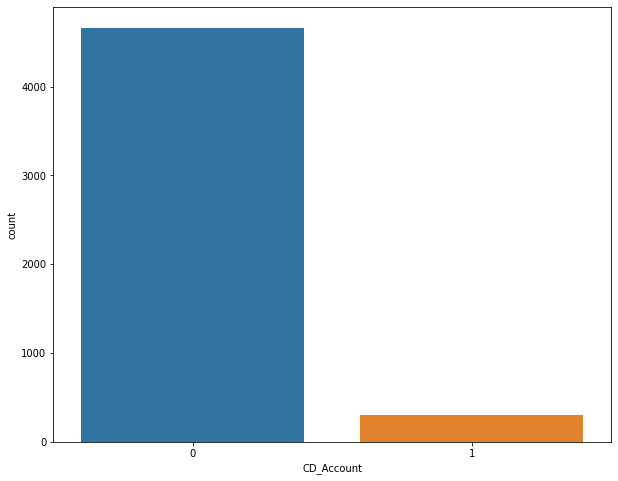

<IPython.core.display.Javascript object>

In [ ]:
#Countplot of the CD account column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'CD_Account', data = data)
ax.set_xticklabels(ax.get_xticklabels());

In [ ]:
#Percentage of customers that have CD accounts
percentage = pd.DataFrame(data['CD_Account'].value_counts(ascending=False))
online = (percentage.loc[1]/percentage.loc[0] * 100).round(2)
print(f'{online[0]}% of customers have a CD account.')

6.48% of customers have a CD account.


<IPython.core.display.Javascript object>

We will convert the CD account feature to a categorical datatype.

In [ ]:
#Convert CD_Account columns to category
data['CD_Account'] = data['CD_Account'].astype('category', errors = 'raise')

<IPython.core.display.Javascript object>

**Credit Card Analysis**

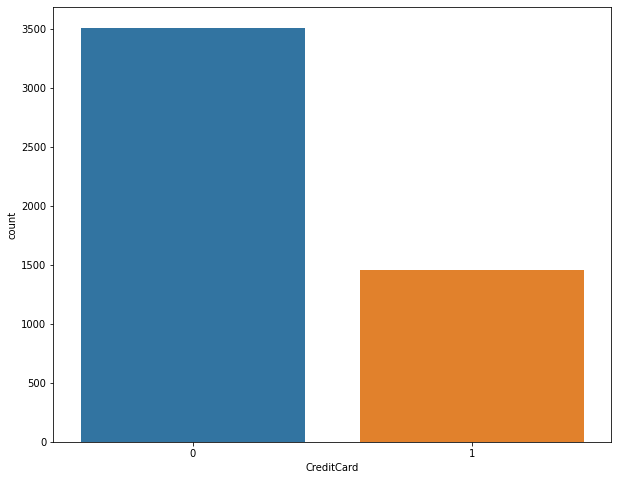

<IPython.core.display.Javascript object>

In [ ]:
#Countplot of the credit card account column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'CreditCard', data = data)
ax.set_xticklabels(ax.get_xticklabels());

In [ ]:
#Percentage of customers that have credit card accounts
percentage = pd.DataFrame(data['CreditCard'].value_counts(ascending=False))
online = (percentage.loc[1]/percentage.loc[0] * 100).round(2)
print(f'{online[0]}% of customers have a credit card account.')

41.56% of customers have a credit card account.


<IPython.core.display.Javascript object>

We will convert the Credit Card feature to a categorical datatype.

In [ ]:
#Convert CreditCard columns to category
data['CreditCard'] = data['CreditCard'].astype('category', errors = 'raise')

<IPython.core.display.Javascript object>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4966 non-null   int64   
 1   Experience          4966 non-null   int64   
 2   Income              4966 non-null   int64   
 3   Family              4966 non-null   int64   
 4   CCAvg               4966 non-null   float64 
 5   Education           4966 non-null   category
 6   Mortgage            4966 non-null   int64   
 7   Personal_Loan       4966 non-null   int64   
 8   Securities_Account  4966 non-null   category
 9   CD_Account          4966 non-null   category
 10  Online              4966 non-null   category
 11  CreditCard          4966 non-null   category
 12  County              4966 non-null   category
 13  Age_Binned          4966 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 307.8 KB


<IPython.core.display.Javascript object>

We now have (6) categorical, (1) float, and (6) int datatypes.

**Summary of Univariate Analysis**

*   The mean age is 45.3 years old and the median age is 45
*   The mean experience is 20.1 and the median age is 20
*   The mean income is approximately \$73,800 and the median is \$64,000 per year. There is approximately \$10,000 defference between the mean and median.
*   The mean CCAvg is 1.9 and the median is 1.5
*   10.63% of customers have a personal loan
*   67.54% of customers use online banking
*   11.62% of customers have security accounts
*   6.48% of customers have a CD account
*   41.56% of customers have a credit card account
*   The top three counties are Los Angeles County, San Diego County, and Santa Clara County
*   The mean education is 1.9 and the median is 2.0



**BiVariate Analysis**

In [ ]:
#Function for Multivariate analysis (code taken from class notes)
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


<IPython.core.display.Javascript object>

**Personal Loan by Family Size**

Family            1     2     3     4   All
Personal_Loan                              
All            1460  1289  1002  1215  4966
0              1354  1183   870  1082  4489
1               106   106   132   133   477
------------------------------------------------------------------------------------------------------------------------


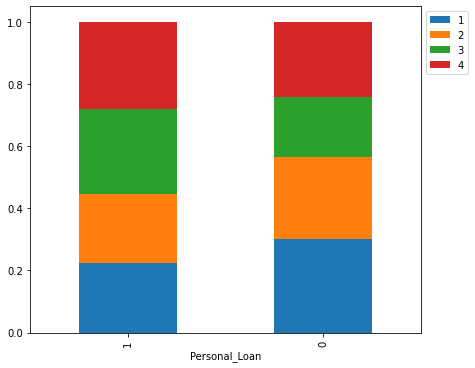

<IPython.core.display.Javascript object>

In [ ]:
#Barplot of personal loan by family size
stacked_barplot(data, "Personal_Loan", "Family")

Family size of 3 or more were the most who took a personal loan.

Education         1     2     3   All
Personal_Loan                        
All            2085  1390  1491  4966
0              1992  1210  1287  4489
1                93   180   204   477
------------------------------------------------------------------------------------------------------------------------


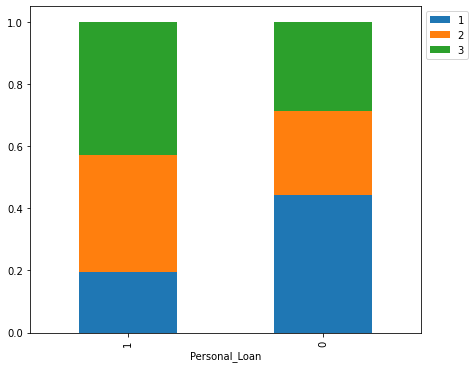

<IPython.core.display.Javascript object>

In [ ]:
#Barplot of personal loan by education
stacked_barplot(data, "Personal_Loan", "Education")

Customers with advanced levels of education (education_2 and education_3) were the most of those who tool the personal loan.

Securities_Account     0    1   All
Personal_Loan                      
All                 4449  517  4966
0                   4032  457  4489
1                    417   60   477
------------------------------------------------------------------------------------------------------------------------


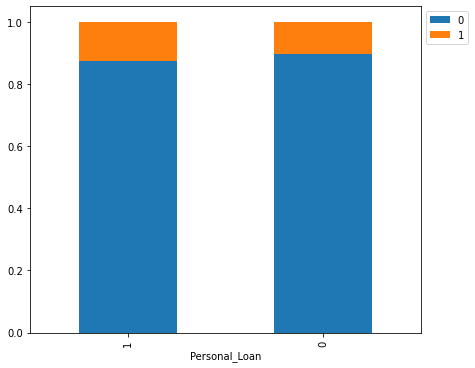

<IPython.core.display.Javascript object>

In [ ]:
#Barplot of personal loan by securities account
stacked_barplot(data, "Personal_Loan", "Securities_Account")

Customers with security accounts are less likely to need a personal loan. Only 60 customers with security accounts took the personal loan.

CreditCard        0     1   All
Personal_Loan                  
All            3508  1458  4966
0              3173  1316  4489
1               335   142   477
------------------------------------------------------------------------------------------------------------------------


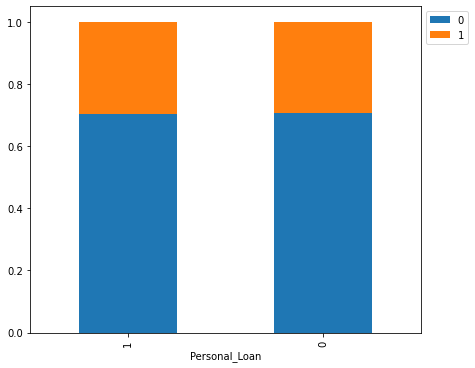

<IPython.core.display.Javascript object>

In [ ]:
#Barplot of personal loan by credit card
stacked_barplot(data, "Personal_Loan", "CreditCard")

There does not appear to be a major difference between customers who have a credit card and those who don't in relation to those who took personal loans.

Online            0     1   All
Personal_Loan                  
All            2002  2964  4966
0              1816  2673  4489
1               186   291   477
------------------------------------------------------------------------------------------------------------------------


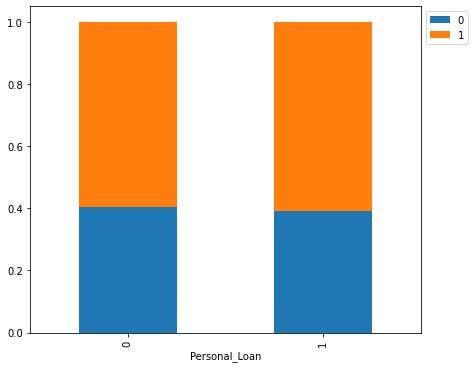

<IPython.core.display.Javascript object>

In [ ]:
#Barplot of personal loan by online
stacked_barplot(data, "Personal_Loan", "Online")

There does not appear to be a major difference between customers who use online banking and those who don't in relation to those who took personal loans.

County         Alameda County  Butte County  Contra Costa County  \
Personal_Loan                                                      
0                         456            17                   73   
All                       500            19                   85   
1                          44             2                   12   

County         El Dorado County  Fresno County  Humboldt County  \
Personal_Loan                                                     
0                            16             24               30   
All                          17             26               32   
1                             1              2                2   

County         Imperial County  Kern County  Lake County  Los Angeles County  \
Personal_Loan                                                                  
0                            3           47            4                 984   
All                          3           54            4                1095   
1  

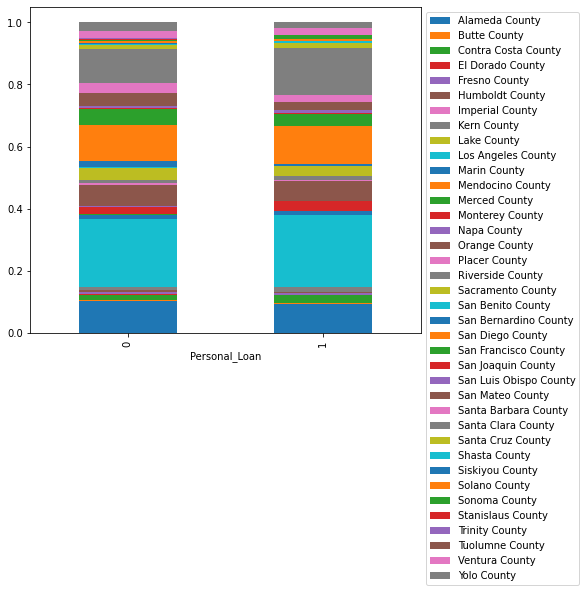

<IPython.core.display.Javascript object>

In [ ]:
#Barplot of personal loan by county
stacked_barplot(data, "Personal_Loan", "County")

The customers who took the loan vs. those who didn't are pretty even across the board. However, there appear to be more customers who took the loan residing in Yolo County versus those who didn't.

Age_Binned     18-30  31-40  41-50  51-60  60-100   All
Personal_Loan                                          
All              618   1227   1261   1316     544  4966
0                552   1111   1140   1201     485  4489
1                 66    116    121    115      59   477
------------------------------------------------------------------------------------------------------------------------


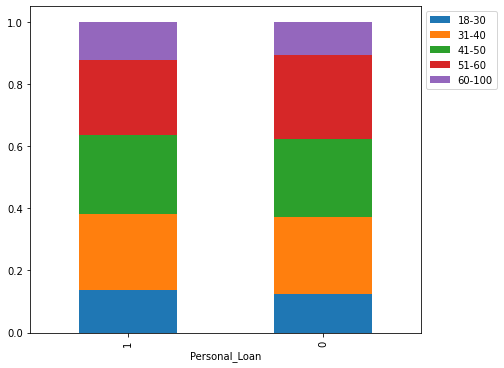

<IPython.core.display.Javascript object>

In [ ]:
#Barplot of personal loan by binned ages
stacked_barplot(data, "Personal_Loan", "Age_Binned")

More people in the 60+ age group took the personal loan than those who didn't. Most people who took the personal loan are between the ages of 30-60. We can now drop the Age_Binned column. This was only created for EDA.

In [ ]:
#Drop Age_Binned column
data.drop(['Age_Binned'], axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

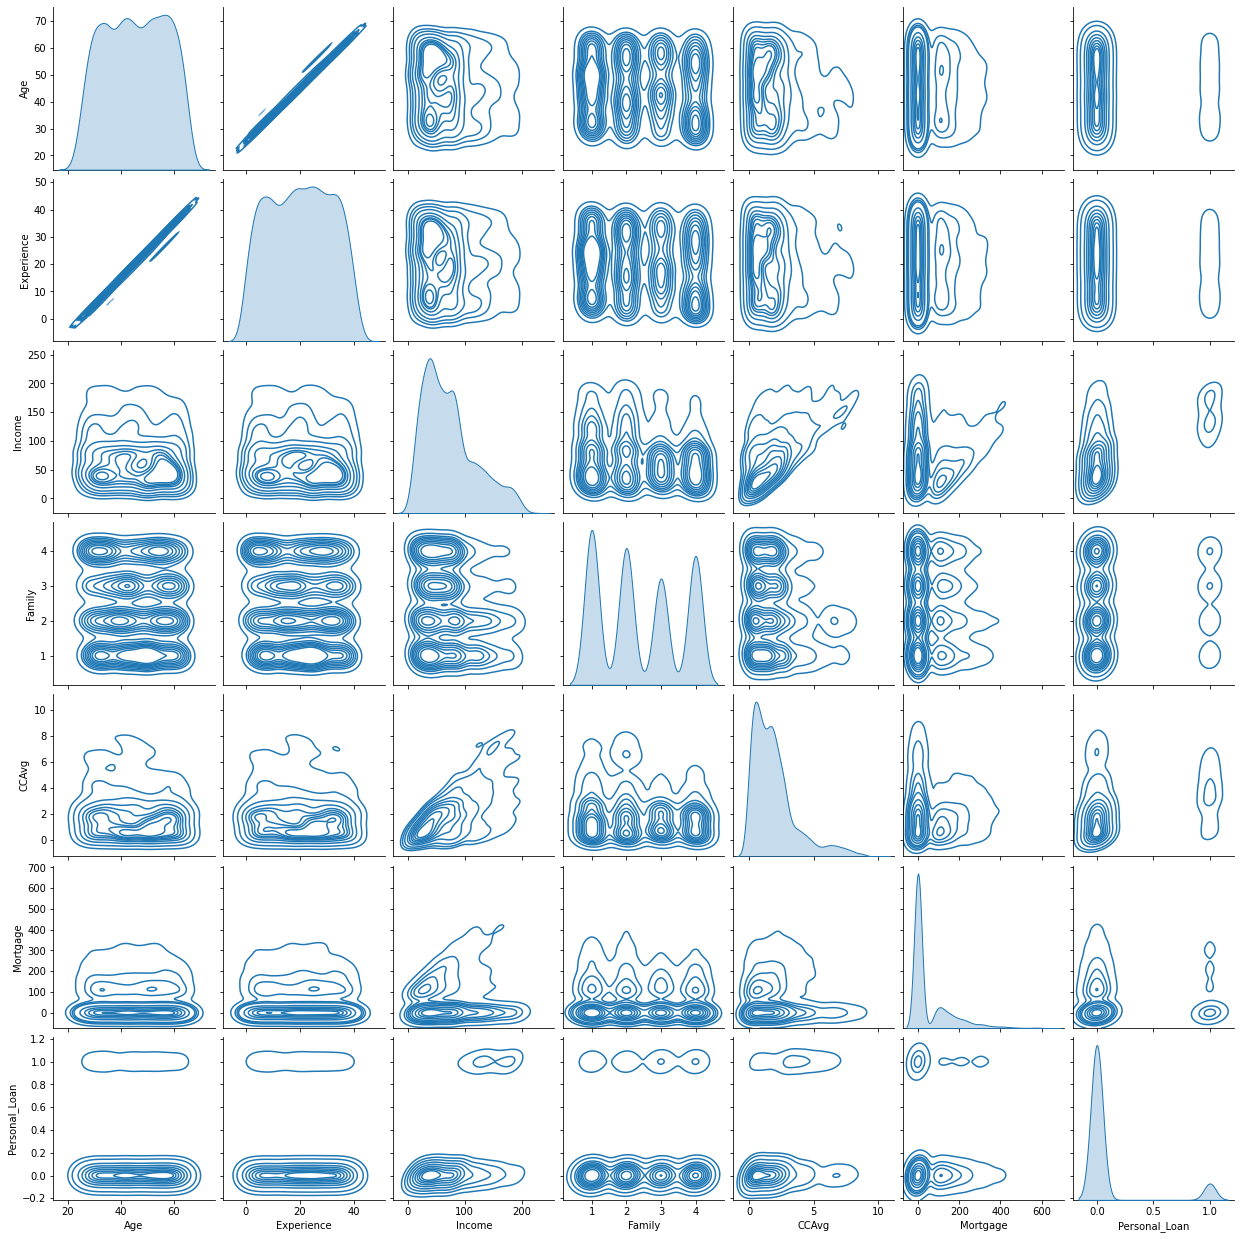

<IPython.core.display.Javascript object>

In [ ]:
#Pairplot of all the numeric features
sns.pairplot(data, kind = 'kde');

In [ ]:
#Evaluation of correlation
data.corr()

Age  Experience    Income    Family     CCAvg  Mortgage  \
Age            1.000000    0.994175 -0.055338 -0.047352 -0.050518 -0.012584   
Experience     0.994175    1.000000 -0.046699 -0.053157 -0.048383 -0.010764   
Income        -0.055338   -0.046699  1.000000 -0.157814  0.645182  0.206874   
Family        -0.047352   -0.053157 -0.157814  1.000000 -0.109634 -0.020888   
CCAvg         -0.050518   -0.048383  0.645182 -0.109634  1.000000  0.110662   
Mortgage      -0.012584   -0.010764  0.206874 -0.020888  0.110662  1.000000   
Personal_Loan -0.007022   -0.007119  0.503186  0.061093  0.366488  0.140844   

               Personal_Loan  
Age                -0.007022  
Experience         -0.007119  
Income              0.503186  
Family              0.061093  
CCAvg               0.366488  
Mortgage            0.140844  
Personal_Loan       1.000000

<IPython.core.display.Javascript object>

The experience column does not appear to offer much value in terms of building the models so we will drop this column. Since age and experience go are so heavily coorelated, we do not need this column. We will drop experience and keep age

In [ ]:
#Drop Experience column
data.drop(['Experience'], axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

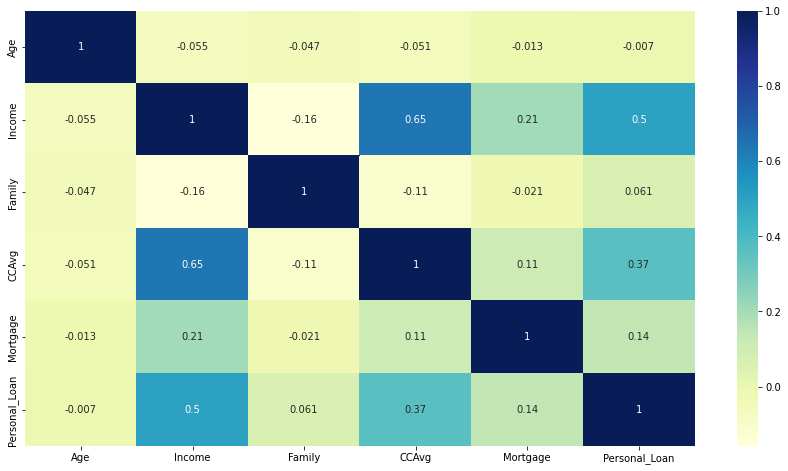

<IPython.core.display.Javascript object>

In [ ]:
#Heatmap/Visual representation of the correlation
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), 
            annot=True, cmap='YlGnBu');

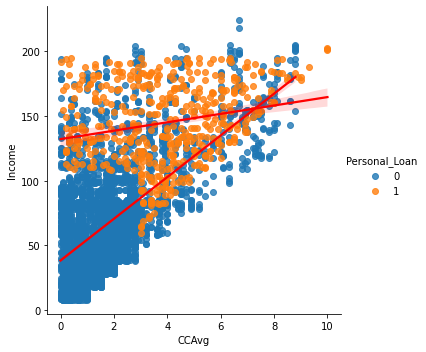

<IPython.core.display.Javascript object>

In [ ]:
#Lmplot of CCAvg and Income with hue Personal Loan
sns.lmplot(x="CCAvg", y='Income', hue = "Personal_Loan", data=data, line_kws={'color': 'red'});

Higher income customers have taken personal loans as compared to those with lowe incomes.

**Logistic Regression Model**

In [ ]:
#Copy dataset for logistic regression model
data_lr = data.copy()

<IPython.core.display.Javascript object>

In [ ]:
#Beginning builing Logistic Regression Model
x = data_lr.drop(['Personal_Loan'], axis=1)
y = data_lr['Personal_Loan']

#Use OneHot Encoding on county, family, and education
oneHotCols=['County','Education', 'Family']
x = pd.get_dummies(x, columns = oneHotCols, drop_first = True)

<IPython.core.display.Javascript object>

In [ ]:
# splitting in training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
#View split
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3476
Number of rows in test data = 1490


<IPython.core.display.Javascript object>

In [ ]:
#Build the model
model = LogisticRegression(solver="liblinear", random_state=1)
lg = model.fit(x_train, y_train)

#predicting on test
y_predict = model.predict(x_test)

#Evaluate the coefficients
coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Age    Income     CCAvg  Mortgage  Securities_Account  \
Coefficients -0.015958  0.048689  0.130694  0.000565           -0.953478   

              CD_Account    Online  CreditCard  County_Butte County  \
Coefficients    3.282806 -0.720624   -0.904538             0.435012   

              County_Contra Costa County  County_El Dorado County  \
Coefficients                    0.655234                -0.039988   

              County_Fresno County  County_Humboldt County  \
Coefficients             -0.473912               -0.313855   

              County_Imperial County  County_Kern County  County_Lake County  \
Coefficients                -0.00439            0.318976           -0.039147   

              County_Los Angeles County  County_Marin County  \
Coefficients                  -0.126878             0.213061   

              County_Mendocino County  County_Merced County  \
Coefficients                 -0.24186             -0.334409   

              County_Monterey County  County_Napa County  \
Coefficients               -0.342349                 0.0   

              County_Orange County  County_Placer County  \
Coefficients             -0.282098              0.058942   

              County_Riverside County  County_Sacramento County  \
Coefficients                -0.267328                 -0.216939   

              County_San Benito County  County_San Bernardino County  \
Coefficients                 -0.241617                     -0.455816   

              County_San Diego County  County_San Francisco County  \
Coefficients                -0.165836                    -0.061769   

              County_San Joaquin County  County_San Luis Obispo County  \
Coefficients                  -0.291535                      -0.417254   

              County_San Mateo County  County_Santa Barbara County  \
Coefficients                -1.356333                    -0.279757   

              County_Santa Clara County  County_Santa Cruz County  \
Coefficients                   0.379395                 -0.483687   

              County_Shasta County  County_Siskiyou County  \
Coefficients             -0.137204               -0.102158   

              County_Solano County  County_Sonoma County  \
Coefficients              0.412756              0.646083   

              County_Stanislaus County  County_Trinity County  \
Coefficients                 -0.219497              -0.095202   

              County_Tuolumne County  County_Ventura County  \
Coefficients               -0.112025               0.003206   

              County_Yolo County  Education_2  Education_3  Family_2  \
Coefficients            0.083358     2.403587     2.500342 -0.466407   

              Family_3  Family_4  Intercept  
Coefficients  1.451375  1.165194  -8.606532

<IPython.core.display.Javascript object>

Coefficient of age, securities account, online, credit card, El Dorado County, Fresno County, Humboldt County, Imperial County, Lake County, Los Angeles County, Mendocino County, Merced County, Monterey County, Placer County, Riverside County, Sacramento County, San Benito County, San Bernardino County, San Diego County, San Francisco County, San Joaquin County, San Luis Obispo County, San Mateo County, Santa Barbara County, Santa Cruz County, Shasta County, Siskiyou County, Stanislaus County, Trinity County, Tuolumne County, and Family_2 are negative, increase in these will lead to decrease in chances they purchase a personal loan.

In [ ]:
print("Original Personal Loan Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal_Loan'] == 1]), (len(data.loc[data['Personal_Loan'] == 1])/len(data.index)) * 100))
print("Original Personal Loan  Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal_Loan'] == 0]), (len(data.loc[data['Personal_Loan'] == 0])/len(data.index)) * 100))
print("")
print("Training Personal Loan  Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan  Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan  True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan  False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan Values    : 477 (9.61%)
Original Personal Loan  Values   : 4489 (90.39%)

Training Personal Loan  Values    : 329 (9.46%)
Training Personal Loan  Values   : 3147 (90.54%)

Test Personal Loan  True Values        : 148 (9.93%)
Test Personal Loan  False Values       : 1342 (90.07%)



<IPython.core.display.Javascript object>

In [ ]:
#Score the model
model_score = model.score(x_test, y_test)
print(model_score)

0.9516778523489933


<IPython.core.display.Javascript object>

In [ ]:
#Create function to return confusion matrix
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

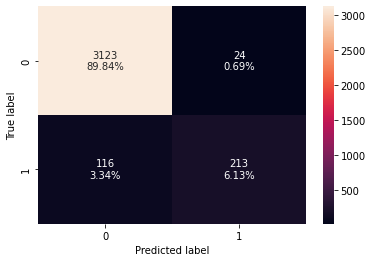

<IPython.core.display.Javascript object>

In [ ]:
#Printing the confusion matrix
confusion_matrix_sklearn_with_threshold(lg, x_train, y_train)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (3,213)

*  **True Positives (TP):** Correctly predicted that they have personal loan (213)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (24 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (116 falsely predict negative Type II error)

In [ ]:
#Function to check performance of a classification model
def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)
    
    #Accuracy
    acc = accuracy_score(target, pred)
    #Recall 
    recall = recall_score(target, pred)
    #Precision  
    precision = precision_score(target, pred)
    #F1-score
    f1 = f1_score(target, pred)  

    # creating a dataframe of metrics
    data_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
         },
        index=[0],)

    return data_perf

<IPython.core.display.Javascript object>

In [ ]:
#Evaluate metrics on the Training Data (Taken from class module)
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(lg, x_train, y_train)
print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0  0.959724  0.647416   0.898734  0.75265

<IPython.core.display.Javascript object>

Accuracy is really good but we can improve on the recall.

As we learned in this module, "the coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. Therefore, odds = exp(b). The percentage change in odds is given as odds = (exp(b) - 1) * 100"

In [ ]:
#Converting coefficients to odds
odds = np.exp(lg.coef_[0])
#Finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100
#Removing limit from number of columns to display
pd.set_option("display.max_columns", None)
# Adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train.columns).T

Age    Income      CCAvg  Mortgage  Securities_Account  \
Odds         0.984169  1.049894   1.139619  1.000565            0.385398   
Change_odd% -1.583136  4.989371  13.961900  0.056524          -61.460165   

              CD_Account     Online  CreditCard  County_Butte County  \
Odds           26.650445   0.486449    0.404729             1.544982   
Change_odd%  2565.044510 -51.355148  -59.527123            54.498217   

             County_Contra Costa County  County_El Dorado County  \
Odds                           1.925593                 0.960801   
Change_odd%                   92.559342                -3.919882   

             County_Fresno County  County_Humboldt County  \
Odds                     0.622562                0.730625   
Change_odd%            -37.743789              -26.937520   

             County_Imperial County  County_Kern County  County_Lake County  \
Odds                       0.995620            1.375718            0.961610   
Change_odd%               -0.438011           37.571808           -3.839025   

             County_Los Angeles County  County_Marin County  \
Odds                          0.880841             1.237460   
Change_odd%                 -11.915913            23.745996   

             County_Mendocino County  County_Merced County  \
Odds                        0.785166              0.715761   
Change_odd%               -21.483387            -28.423906   

             County_Monterey County  County_Napa County  County_Orange County  \
Odds                       0.710101                 1.0              0.754200   
Change_odd%              -28.989945                 0.0            -24.580049   

             County_Placer County  County_Riverside County  \
Odds                     1.060714                 0.765422   
Change_odd%              6.071423               -23.457782   

             County_Sacramento County  County_San Benito County  \
Odds                         0.804979                  0.785357   
Change_odd%                -19.502106                -21.464311   

             County_San Bernardino County  County_San Diego County  \
Odds                             0.633930                 0.847185   
Change_odd%                    -36.606959               -15.281457   

             County_San Francisco County  County_San Joaquin County  \
Odds                            0.940100                   0.747116   
Change_odd%                    -5.989961                 -25.288405   

             County_San Luis Obispo County  County_San Mateo County  \
Odds                              0.658853                 0.257604   
Change_odd%                     -34.114670               -74.239641   

             County_Santa Barbara County  County_Santa Clara County  \
Odds                            0.755967                    1.46140   
Change_odd%                   -24.403257                   46.13997   

             County_Santa Cruz County  County_Shasta County  \
Odds                         0.616506              0.871792   
Change_odd%                -38.349375            -12.820756   

             County_Siskiyou County  County_Solano County  \
Odds                       0.902887              1.510977   
Change_odd%               -9.711289             51.097698   

             County_Sonoma County  County_Stanislaus County  \
Odds                     1.908053                  0.802923   
Change_odd%             90.805324                -19.707708   

             County_Trinity County  County_Tuolumne County  \
Odds                      0.909189                0.894022   
Change_odd%              -9.081104              -10.597786   

             County_Ventura County  County_Yolo County  Education_2  \
Odds                      1.003211            1.086931    11.062789   
Change_odd%               0.321147            8.693092  1006.278919   

             Education_3   Family_2    Family_3    Family_4  
Odds           12.186661   0.627252    4.268982    3.20

<IPython.core.display.Javascript object>

*   **Age:** A 1 unit change in Age will decrease the odds of a person buying a personal loan by 0.98 times or a 1.58% decrease in odds of having purchased a personal loan.
*  **Income:** a 1 unit change in the Income will increase the odds of a person having purchased a personal loan by 1.05 times or a 4.99% increase in odds of having purchased a personal loan.
*  **CCAvg:** a 1 unit change in the CCAvg will increase the odds of a person having purchased a personal loan by 1.14 times or a 13.96% increase in odds of having purchased a personal loan.
*  **Mortgage:** a 1 unit change in the mortgage will increase the odds of a person having purchased a personal loan by 1.00 times or a 0.06% increase in odds of having purchased a personal loan.
*  **Securities_Account:** a 1 unit change in the securities_account will decrease the odds of a person having purchased a personal loan by 0.39 times or a 61.46% decrease in odds of having purchased a personal loan.
*  **CD_Account:** a 1 unit change in the CD_account will increase the odds of a person having purchased a personal loan by 26.65 times or a 2565.05% increase in odds of having purchased a personal loan.
*  **Online:** a 1 unit change in the online will decrease the odds of a person having purchased a personal loan by 0.49 times or a 51.36% decrease in odds of having purchased a personal loan.
*  **Credit Card:** a 1 unit change in the Credit Card will decrease the odds of a person having purchased a personal loan by 0.40 times or a 59.35% decrease in odds of having purchased a personal loan.

Other noticiable considerations include:

*  **County_Contra Costa County:** a 1 unit change in the County_Contra Costa County will increase the odds of a person having purchased a personal loan by 1.93 times or a 92.56% increase in odds of having purchased a personal loan.
*  **County_Sonoma County:** a 1 unit change in the County_Sonoma County will increase the odds of a person having purchased a personal loan by 1.91 times or a 90.81% increase in odds of having purchased a personal loan.
*  **County_Sonoma County:** a 1 unit change in the County_Sonoma County will increase the odds of a person having purchased a personal loan by 1.91 times or a 90.81% increase in odds of having purchased a personal loan. 
* **Education_2:** a 1 unit change in the Education_2 will increase the odds of a person having purchased a personal loan by 11.91 times or a 1006.28% increase in odds of having purchased a personal loan. 
* **Education_3:** a 1 unit change in the Education_3 will increase the odds of a person having purchased a personal loan by 12.19 times or a 1118.67% increase in odds of having purchased a personal loan. 
* **Family_3:** a 1 unit change in the Family_3 will increase the odds of a person having purchased a personal loan by 4.27 times or a 326.90% increase in odds of having purchased a personal loan. 
* **Family_4:** a 1 unit change in the Family_4 will increase the odds of a person having purchased a personal loan by 3.21 times or a 220.66% increase in odds of having purchased a personal loan. 





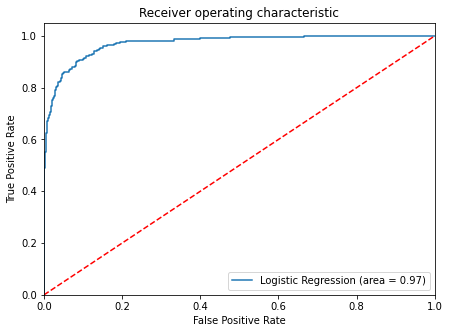

<IPython.core.display.Javascript object>

In [ ]:
#Plot the ROC-AOC
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(x_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(x_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Optimal threshold as per AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(x_train)[:, 1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1278604841393869


<IPython.core.display.Javascript object>

In [ ]:
#Function for confusion matrix with optimal threahold
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.1278604841393869):
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

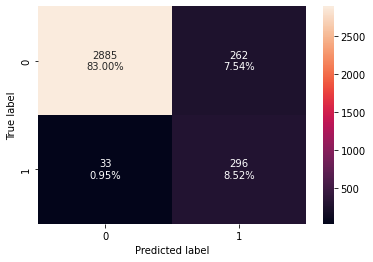

<IPython.core.display.Javascript object>

In [ ]:
#Confusion matrix
confusion_matrix_sklearn_with_threshold(lg, x_train, y_train, threshold=optimal_threshold_auc_roc)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (2,885)

*  **True Positives (TP):** Correctly predicted that they have personal loan (296)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (262 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (33 falsely predict negative Type II error)

In [ ]:
#Checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(lg, x_train, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.915132  0.899696   0.530466  0.667418

<IPython.core.display.Javascript object>

This significantly improved the recall score but reduced to precision.

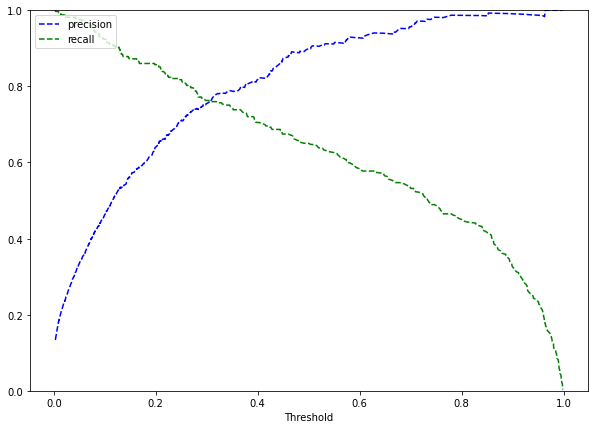

<IPython.core.display.Javascript object>

In [ ]:
#Plot precision and recall
y_scores = lg.predict_proba(x_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

We will test now by setting threshold to 0.33

In [ ]:
#Setting the threshold
optimal_threshold_curve = 0.33

<IPython.core.display.Javascript object>

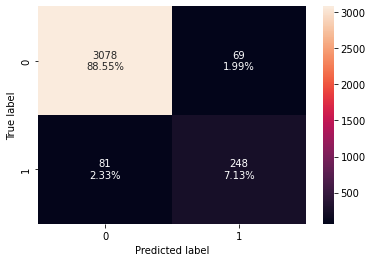

<IPython.core.display.Javascript object>

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, x_train, y_train, threshold=optimal_threshold_curve)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (3,078)

*  **True Positives (TP):** Correctly predicted that they have personal loan (248)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (69 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (81 falsely predict negative Type II error)

In [ ]:
#Metrics with threshold set to 0.33
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(lg, x_train, y_train, threshold=optimal_threshold_curve)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.956847  0.753799   0.782334  0.767802

<IPython.core.display.Javascript object>

The recall score dropped, but the precision increased.

In [ ]:
#Training performance comparison
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.12 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.12 Threshold  \
Accuracy                      0.959724                            0.915132   
Recall                        0.647416                            0.899696   
Precision                     0.898734                            0.530466   
F1                            0.752650                            0.667418   

           Logistic Regression-0.33 Threshold  
Accuracy                             0.956847  
Recall                               0.753799  
Precision                            0.782334  
F1                                   0.767802

<IPython.core.display.Javascript object>

Regression-0.12 Threshold is the best for the model on the training data.

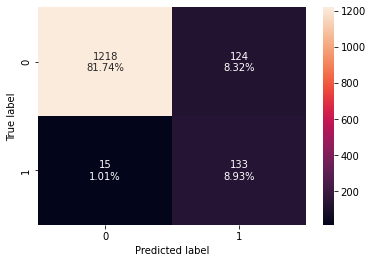

<IPython.core.display.Javascript object>

In [ ]:
#Creating confusion matrix on test data
confusion_matrix_sklearn_with_threshold(lg, x_test, y_test)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (1,218)

*  **True Positives (TP):** Correctly predicted that they have personal loan (133)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (124 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (15 falsely predict negative Type II error)

In [ ]:
#Metrics on test data
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(lg, x_test, y_test)
print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision        F1
0  0.951678  0.608108   0.865385  0.714286

<IPython.core.display.Javascript object>

We will see if we can improve the recall scores using the optimal threshold. This has a really decent precision score however.

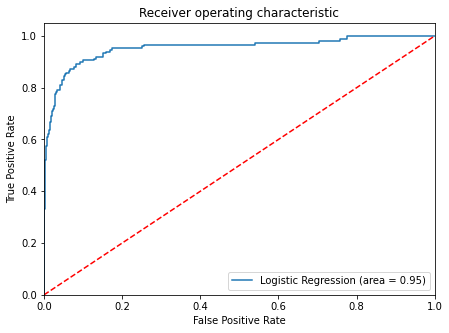

<IPython.core.display.Javascript object>

In [ ]:
#Plot test data
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(x_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

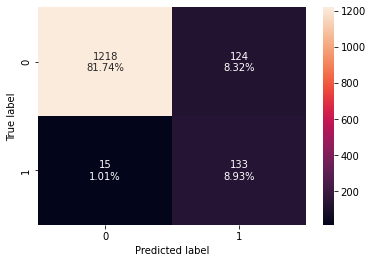

<IPython.core.display.Javascript object>

In [ ]:
#Creating confusion matrix on test with optimal threshold
confusion_matrix_sklearn_with_threshold(lg, x_test, y_test, threshold=optimal_threshold_auc_roc)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (1,218)

*  **True Positives (TP):** Correctly predicted that they have personal loan (133)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (124 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (15 falsely predict negative Type II error)

In [ ]:
#Checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(lg, x_test, y_test, threshold=optimal_threshold_auc_roc)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision       F1
0  0.906711  0.898649    0.51751  0.65679

<IPython.core.display.Javascript object>

We significantly improved the recall score, but precision dropped.

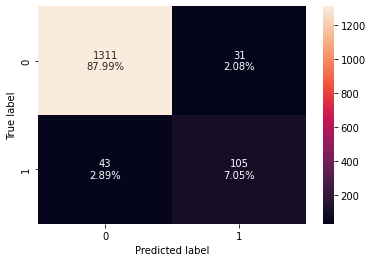

<IPython.core.display.Javascript object>

In [ ]:
#Creating confusion matrix with optimal threshold
confusion_matrix_sklearn_with_threshold(lg, x_test, y_test, threshold=optimal_threshold_curve)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (1,311)

*  **True Positives (TP):** Correctly predicted that they have personal loan (105)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (31 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (43 falsely predict negative Type II error)

**NOTE:** Type I errors reduced to 31 from 124, but type II errors increased to 43 from 15.

In [ ]:
#Testing performance 
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(lg, x_test, y_test, threshold=optimal_threshold_curve)
log_reg_model_test_perf_threshold_curve
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.12 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.12 Threshold  \
Accuracy                      0.951678                            0.906711   
Recall                        0.608108                            0.898649   
Precision                     0.865385                            0.517510   
F1                            0.714286                            0.656790   

           Logistic Regression-0.33 Threshold  
Accuracy                             0.950336  
Recall                               0.709459  
Precision                            0.772059  
F1                                   0.739437

<IPython.core.display.Javascript object>

In [ ]:
#Checking model performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, x_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.950336  0.709459   0.772059  0.739437

<IPython.core.display.Javascript object>

**Decision Tree**

In [ ]:
#Make a copy of original dataset
data_dt = data.copy()

<IPython.core.display.Javascript object>

In [ ]:
#Function to compute different metrics to check performance of decision tree
def model_performance_classification_sklearn(model, predictors, target):
    #Predicting using the independent variables
    pred = model.predict(predictors)
    #Compute Accuracy
    acc = accuracy_score(target, pred)
    #Compute Recall  
    recall = recall_score(target, pred) 
    #Compute Precision 
    precision = precision_score(target, pred)
    #Compute F1-score  
    f1 = f1_score(target, pred)  

    #Creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [ ]:
#Function to create confusion matrix for decision tree classifiers
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model1.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [ ]:
#Beginning builing Logistic Decision Tree Model
x = data_dt.drop(["Personal_Loan"], axis=1)
y = data_dt["Personal_Loan"]

<IPython.core.display.Javascript object>

In [ ]:
#Use OneHot Encoding on county, family, and education
oneHotCols=['County','Education', 'Family']
x = pd.get_dummies(x, columns = oneHotCols, drop_first = True)
x.head()

Age  Income  CCAvg  Mortgage Securities_Account CD_Account Online  \
0   25      49    1.6         0                  1          0      0   
1   45      34    1.5         0                  1          0      0   
2   39      11    1.0         0                  0          0      0   
3   35     100    2.7         0                  0          0      0   
4   35      45    1.0         0                  0          0      0   

  CreditCard  County_Butte County  County_Contra Costa County  \
0          0                    0                           0   
1          0                    0                           0   
2          0                    0                           0   
3          0                    0                           0   
4          1                    0                           0   

   County_El Dorado County  County_Fresno County  County_Humboldt County  \
0                        0                     0                       0   
1                        0                     0                       0   
2                        0                     0                       0   
3                        0                     0                       0   
4                        0                     0                       0   

   County_Imperial County  County_Kern County  County_Lake County  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   

   County_Los Angeles County  County_Marin County  County_Mendocino County  \
0                          1                    0                        0   
1                          1                    0                        0   
2                          0                    0                        0   
3                          0                    0                        0   
4                          1                    0                        0   

   County_Merced County  County_Monterey County  County_Napa County  \
0                     0                       0                   0   
1                     0                       0                   0   
2                     0                       0                   0   
3                     0                       0                   0   
4                     0                       0                   0   

   County_Orange County  County_Placer County  County_Riverside County  \
0                     0                     0                        0   
1                     0                     0                        0   
2                     0                     0                        0   
3                     0                     0                        0   
4                     0                     0                        0   

   County_Sacramento County  County_San Benito County  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   County_San Bernardino County  County_San Diego County  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   County_San Francisco County  County_San Joaquin County  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                 

<IPython.core.display.Javascript object>

In [ ]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
#Review the split
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3476
Number of rows in test data = 1490


<IPython.core.display.Javascript object>

In [ ]:
#Review percentage of classes in both training and test dataset
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905351
1    0.094649
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900671
1    0.099329
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

In [ ]:
#Gini
model1 = DecisionTreeClassifier(criterion="gini", random_state=1)
model1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
#Entropy
model2 = DecisionTreeClassifier(criterion="entropy", random_state=1)
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

<IPython.core.display.Javascript object>

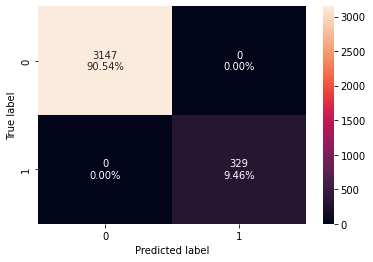

<IPython.core.display.Javascript object>

In [ ]:
#Gini confusion matrix (training)
confusion_matrix_sklearn(model1, x_train, y_train)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (3,147)

*  **True Positives (TP):** Correctly predicted that they have personal loan (329)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (0 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (0 falsely predict negative Type II error)

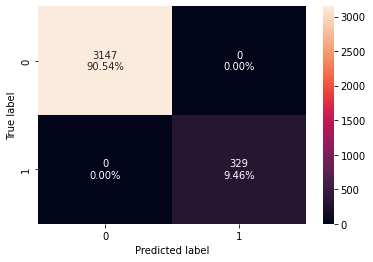

<IPython.core.display.Javascript object>

In [ ]:
#Entropy confusion matrix (training)
confusion_matrix_sklearn(model2, x_train, y_train)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (3,147)

*  **True Positives (TP):** Correctly predicted that they have personal loan (329)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (0 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (0 falsely predict negative Type II error)

In [ ]:
#Evaluate metrics of Gini tree (training)
decision_tree_perf_training = model_performance_classification_sklearn(model1, x_train, y_train)
decision_tree_perf_training

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [ ]:
#Evaluate metrics of Gini tree (training)
decision_tree_perf_training = model_performance_classification_sklearn(model2, x_train, y_train)
decision_tree_perf_training

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [ ]:
#Evaluate metrics of Gini tree
decision_tree_perf_test = model_performance_classification_sklearn(model1, x_test, y_test)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.979866  0.878378   0.915493  0.896552

<IPython.core.display.Javascript object>

This model has a high accuracy, high recall, high precision, and high F1 scores.

In [ ]:
#Evaluate metrics of entropy tree
decision_tree_perf_test = model_performance_classification_sklearn(model2, x_test, y_test)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.981208  0.871622   0.934783  0.902098

<IPython.core.display.Javascript object>

The entropy tree has better metric scores than the gini criterion.

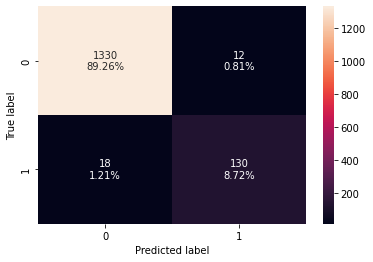

<IPython.core.display.Javascript object>

In [ ]:
#Gini confusion matrix (test)
confusion_matrix_sklearn(model1, x_test, y_test)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (1,330)

*  **True Positives (TP):** Correctly predicted that they have personal loan (130)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (12 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (18 falsely predict negative Type II error)

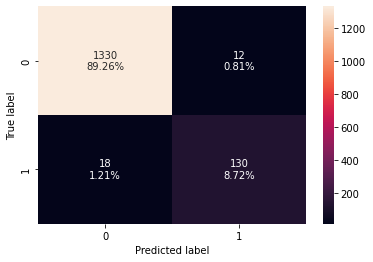

<IPython.core.display.Javascript object>

In [ ]:
#Entropy confusion matrix (test)
confusion_matrix_sklearn(model2, x_test, y_test)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (1,330)

*  **True Positives (TP):** Correctly predicted that they have personal loan (130)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (12 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (18 falsely predict negative Type II error)

In [ ]:
#Features for decision tree plot
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'County_Solano County', 'County_Sonoma County', 'County_Stanislaus County', 'County_Trinity County', '

<IPython.core.display.Javascript object>

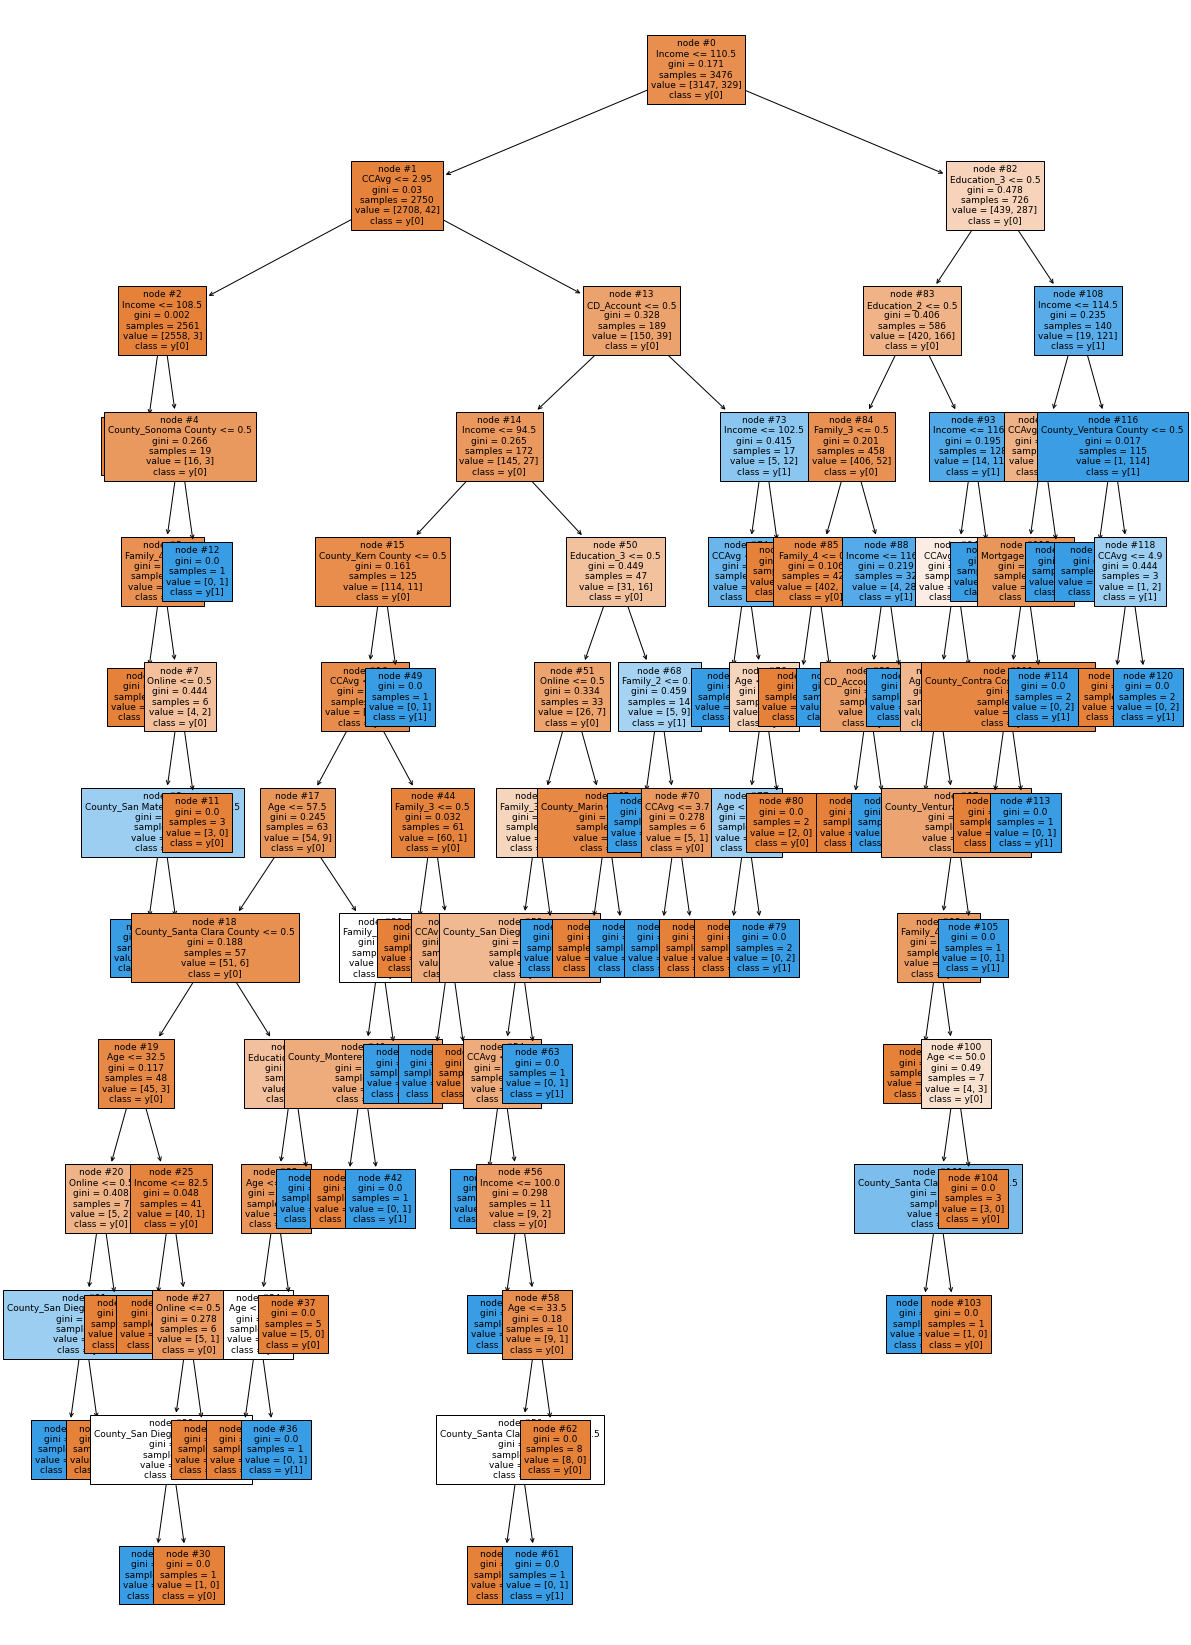

<IPython.core.display.Javascript object>

In [ ]:
#Plot decision tree for Gini decision tree model
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
#Text version of gini decision tree
print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 108.50
|   |   |   |--- weights: [2542.00, 0.00] class: 0
|   |   |--- Income >  108.50
|   |   |   |--- County_Sonoma County <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |--- County_San Mateo County <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |--- County_San Mateo County >  0.50
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |--- County_Sonoma County >  0.50
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 94.50
|   |   |   |   |--- County_Kern County <= 0.50
|   |   |   |   |   |--- CCAvg <= 3.65
| 

<IPython.core.display.Javascript object>

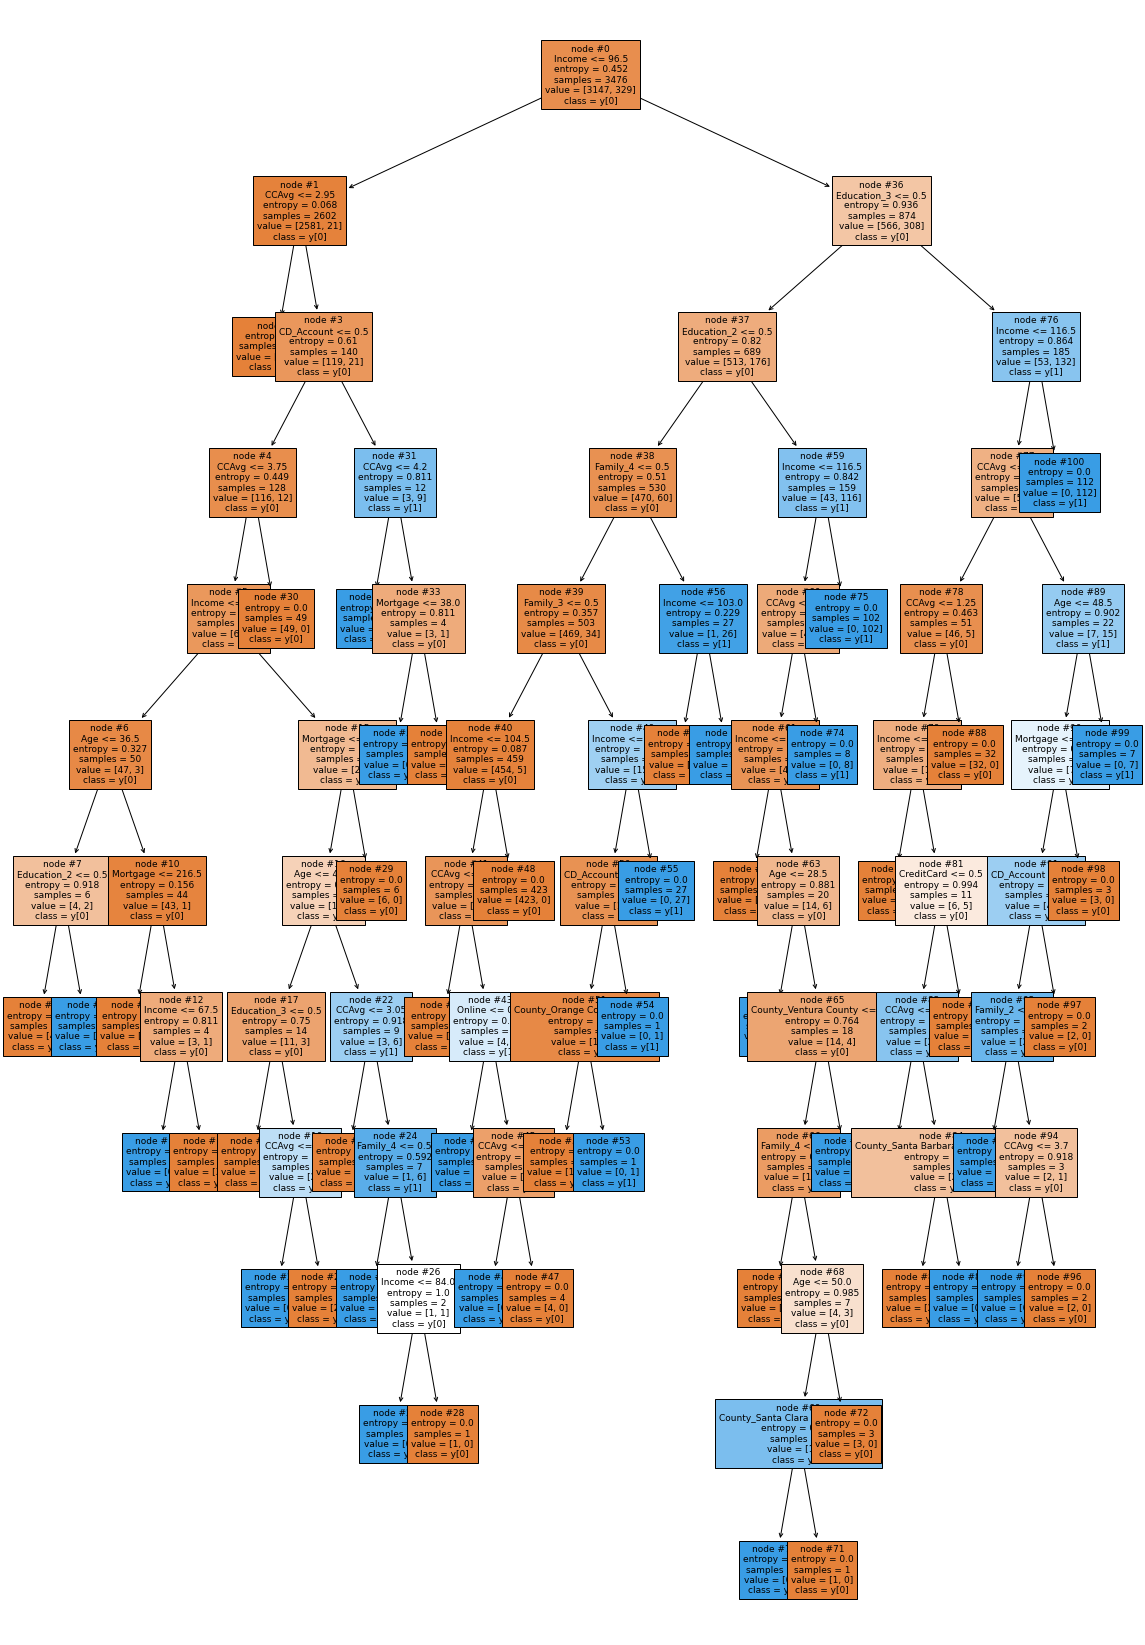

<IPython.core.display.Javascript object>

In [ ]:
#Plot decision tree for entropy decision tree model
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
#Text version of entropy decision tree
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 96.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2462.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.75
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- weights: [40.00, 0.00] class: 0
|   |   |   |   |   |   |--- Mortgage >  216.50
|   |   |   |   |   |   |   |--- Income <= 67.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- Income >  67.50
|   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <= 158.00
|   |   

<IPython.core.display.Javascript object>

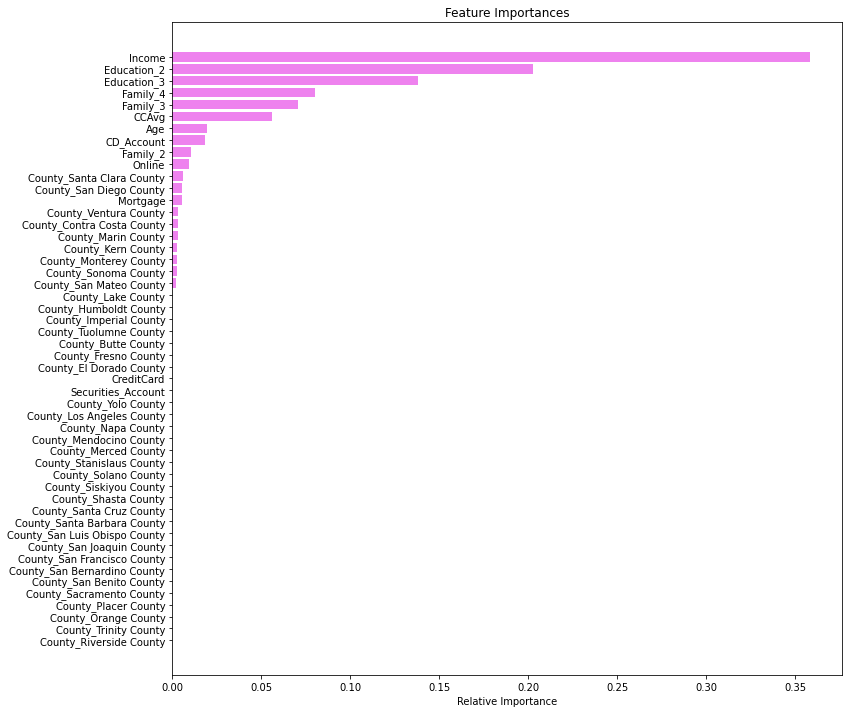

<IPython.core.display.Javascript object>

In [ ]:
#Plot importance of gini decision tree
importances = model1.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features of the gini decision tree model are:

*   Income
*   Education_2
*   Education_3
*   Family_4
*   Family_3



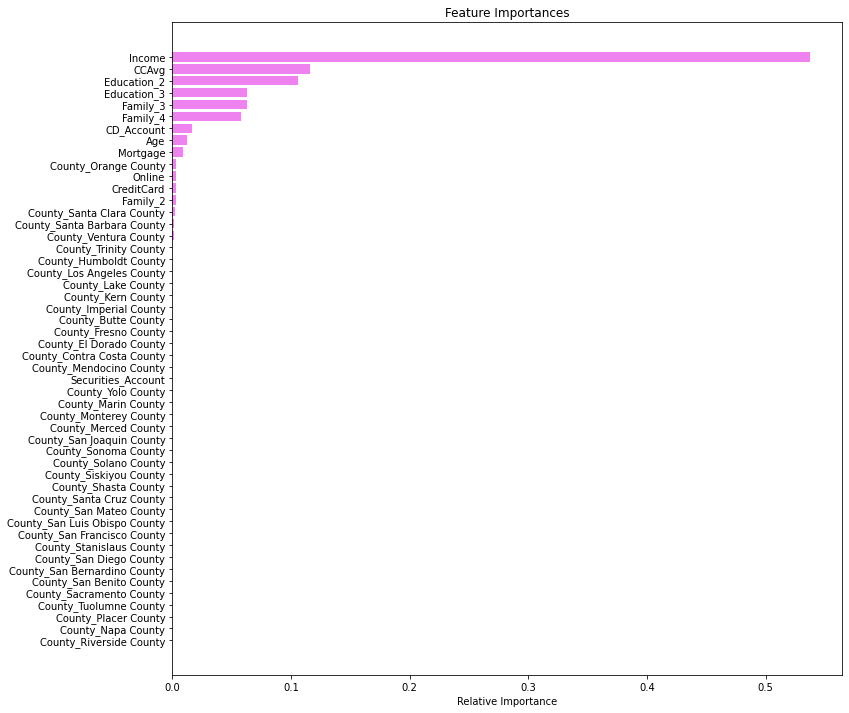

<IPython.core.display.Javascript object>

In [ ]:
#Plot importance of entropy decision tree
importances = model2.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features of the gini decision tree model are:

*   Income
*   CCAvg
*   Education_2
*   Education_3
*   Family_3

In [ ]:
#Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:.15,1:.85})

#Grid of parameters to choose from
parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Run the grid search
grid_obj = GridSearchCV(estimator, param_grid=parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

#Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

#Fit the best algorithm to the data
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       min_impurity_decrease=1e-06, random_state=1)

<IPython.core.display.Javascript object>

The best decision tree using GridSearchCV() is:

*   class_weight={0: 0.15, 1: 0.85}
*   criterion='entropy'
*   min_impurity_decrease=1e-06
*   random_state=1

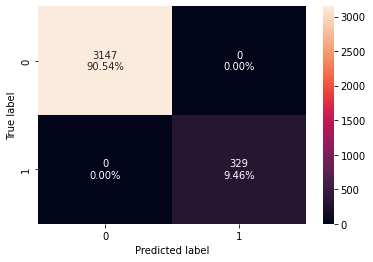

<IPython.core.display.Javascript object>

In [ ]:
#Confusion matrix using estimator (training)
confusion_matrix_sklearn(estimator, x_train, y_train)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (3,147)

*  **True Positives (TP):** Correctly predicted that they have personal loan (329)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (0 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (0 falsely predict negative Type II error)*italicized text*

In [ ]:
#Score tree based on estimator (training)
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, x_train, y_train)
decision_tree_tune_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [ ]:
#Score tree based on estimator (training)
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, x_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.981208  0.885135   0.922535  0.903448

<IPython.core.display.Javascript object>

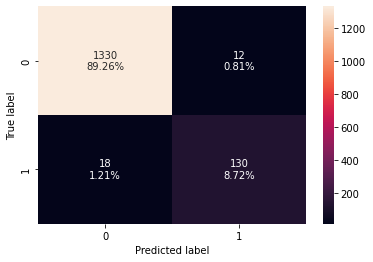

<IPython.core.display.Javascript object>

In [ ]:
#Score tree based on estimator (test)
confusion_matrix_sklearn(estimator, x_test, y_test)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (1,330)

*  **True Positives (TP):** Correctly predicted that they have personal loan (130)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (12 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (18 falsely predict negative Type II error)

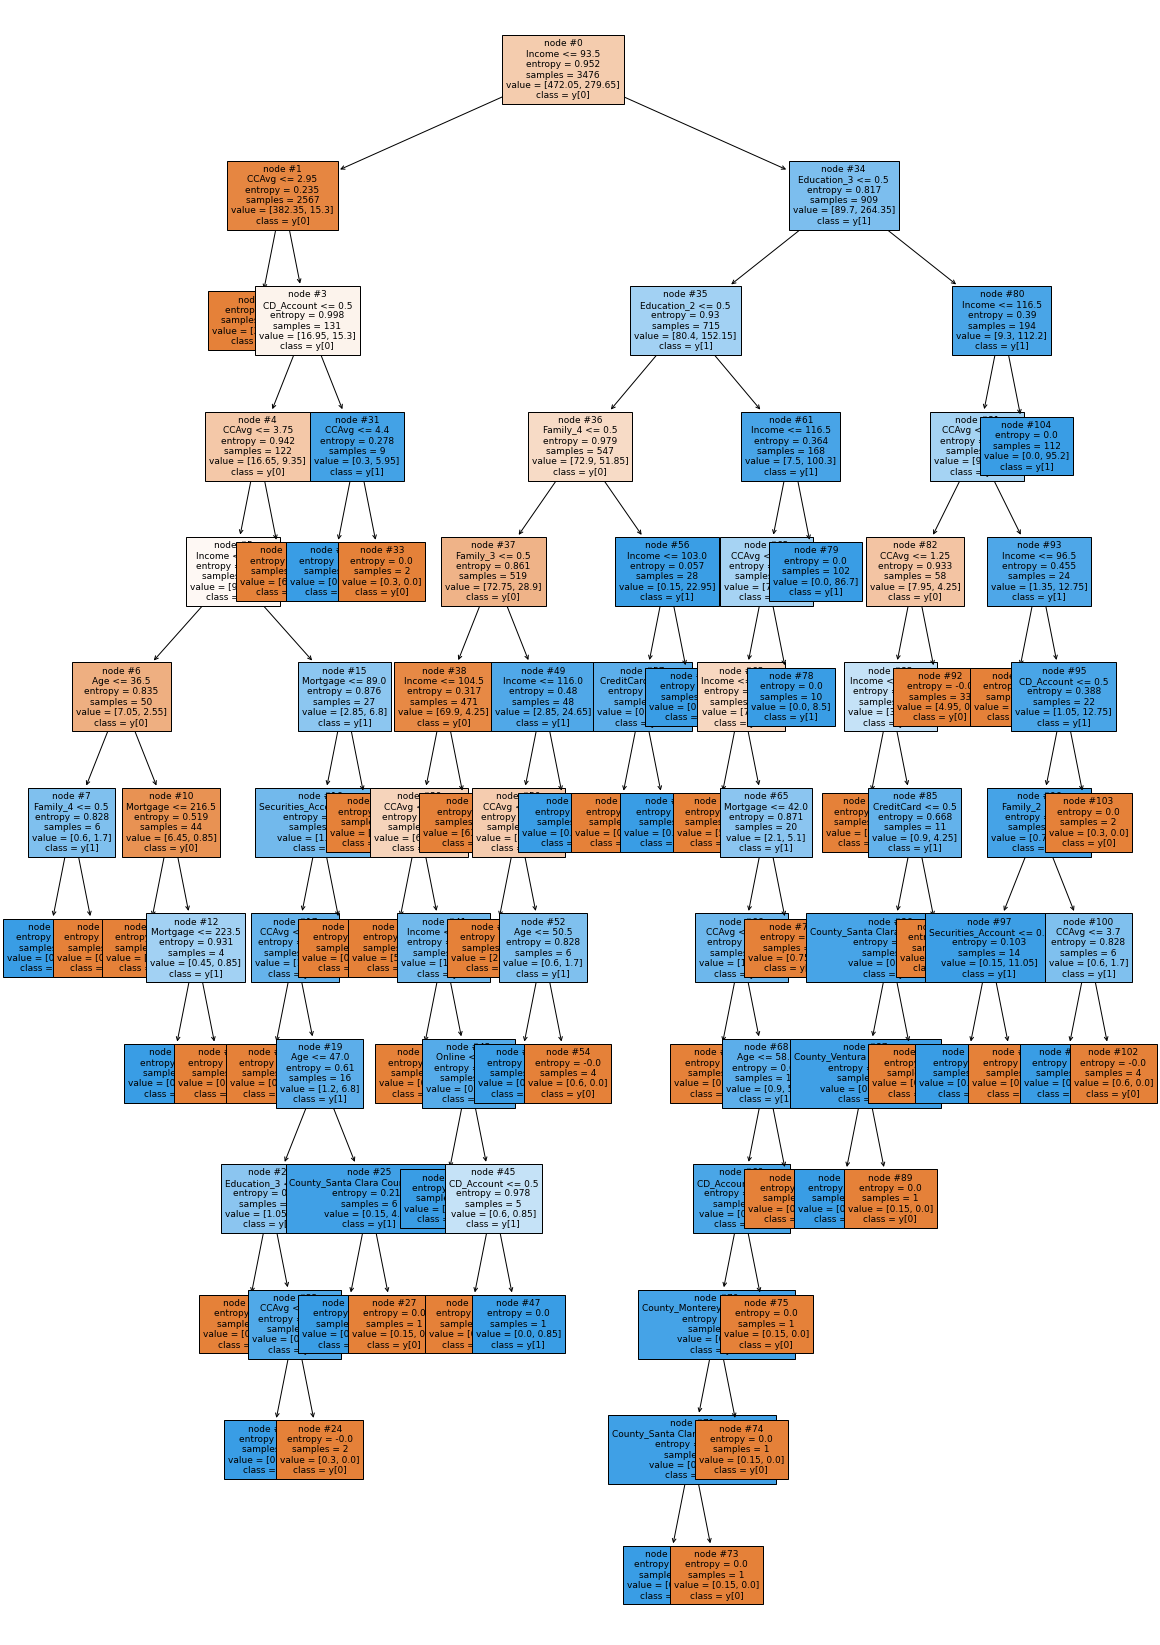

<IPython.core.display.Javascript object>

In [ ]:
#Plot tree with estimator
plt.figure(figsize=(20, 30))
tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [ ]:
#Text version of decision tree (estimator)
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 93.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [365.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.75
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |--- Mortgage >  216.50
|   |   |   |   |   |   |   |--- Mortgage <= 223.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- Mortgage >  223.50
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <= 89.00
|   |   |  

<IPython.core.display.Javascript object>

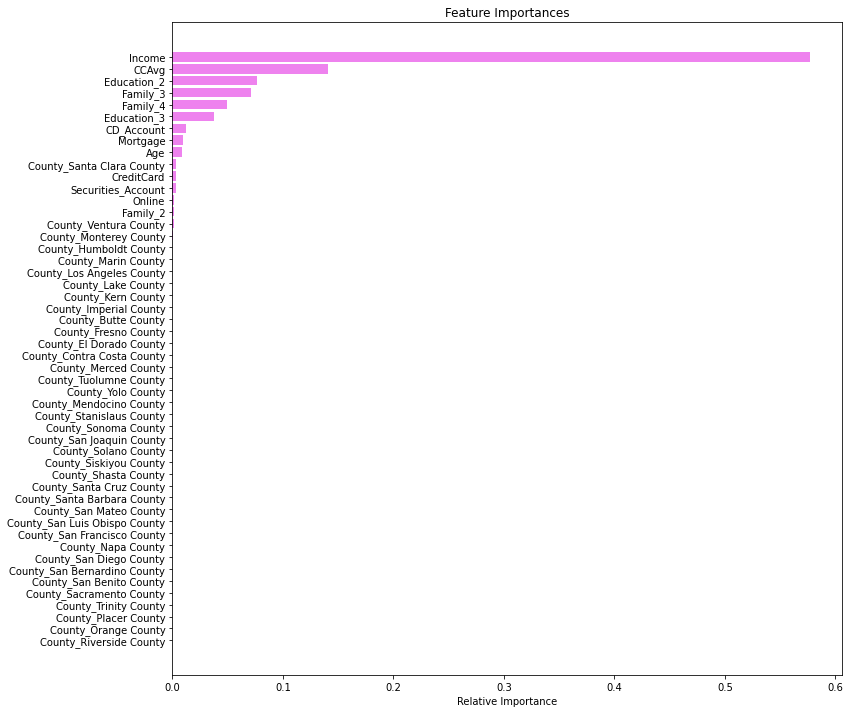

<IPython.core.display.Javascript object>

In [ ]:
#Plot importance of estimator decision tree
importances = estimator.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features of the gini decision tree model are:

*   Income
*   CCAvg
*   Education_2
*   Family_3
*   Family_4

In [ ]:
#Cost complexity pruning (Post-Pruning)
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [ ]:
#Return dataframe of alphas and impurities
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000187    0.000561
2     0.000247    0.001055
3     0.000259    0.001572
4     0.000283    0.002138
5     0.000285    0.002709
6     0.000341    0.003732
7     0.000345    0.004422
8     0.000351    0.005123
9     0.000352    0.006180
10    0.000359    0.007256
11    0.000432    0.008119
12    0.000432    0.008550
13    0.000437    0.010300
14    0.000453    0.011658
15    0.000460    0.012118
16    0.000478    0.012596
17    0.000479    0.013076
18    0.000482    0.013558
19    0.000543    0.014102
20    0.000545    0.014647
21    0.000559    0.015205
22    0.000627    0.015832
23    0.000670    0.017172
24    0.000934    0.018107
25    0.001210    0.020526
26    0.001252    0.021778
27    0.001301    0.023079
28    0.001420    0.024500
29    0.001554    0.026053
30    0.002682    0.028735
31    0.003456    0.032192
32    0.004263    0.036455
33    0.005978    0.042433
34    0.012254    0.066942
35    0.028354    0.123649
36    0.047732    0.171381

<IPython.core.display.Javascript object>

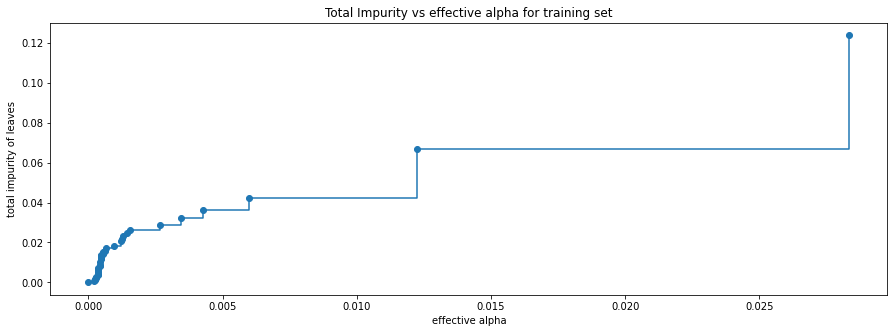

<IPython.core.display.Javascript object>

In [ ]:
#Plot Total Impurity vs effective alpha for training set
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

As we learned in this module, as alpha grows, so does the impurities - which in turn, makes a simpler tree.

In [ ]:
#Print the number of nodes in the last tree
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04773178896268279


<IPython.core.display.Javascript object>

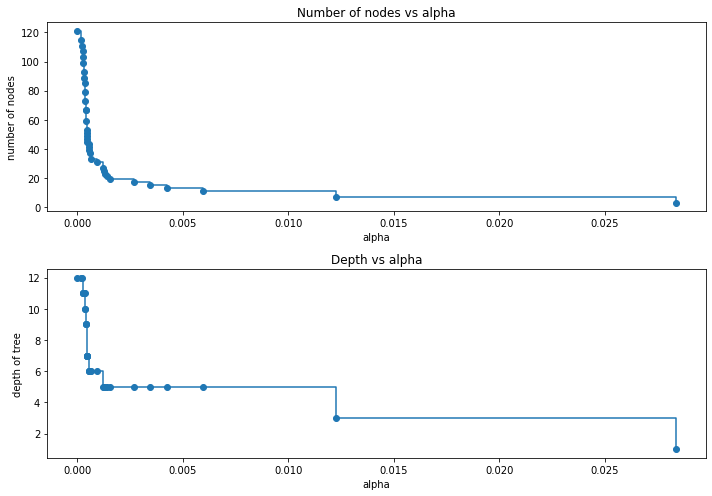

<IPython.core.display.Javascript object>

In [ ]:
#Plot Number of nodes vs alpha and Depth vs alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

As the alpha decreases, so does the number of nodes. Additionally. as the alphas, the depth also decreases. This is what we see in the graphs above.

In [ ]:
#Review the accuracy
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

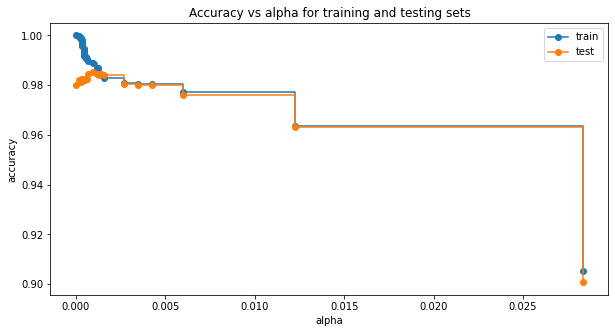

<IPython.core.display.Javascript object>

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

We see that the accuracy of the training data decreases from top down and the accuracy of the testing data goes slightly up around 0.98 and drops.

In [ ]:
#Recall for training
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [ ]:
#Recall for test
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

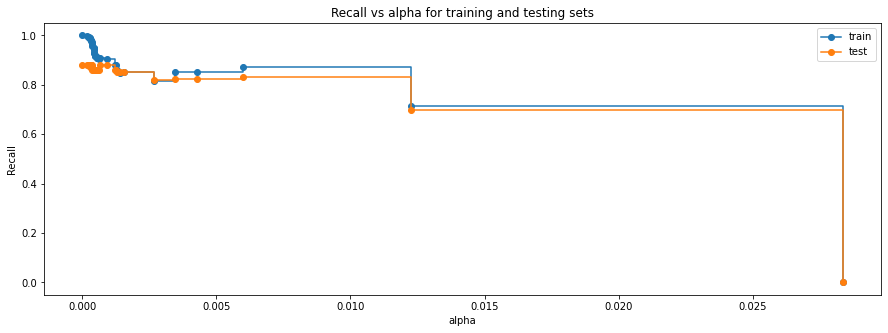

<IPython.core.display.Javascript object>

In [ ]:
#Plot Recall vs alpha for training and testing sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#Create model with highest train and test recall
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ', best_model.score(x_train, y_train))
print('Test accuracy of best model: ', best_model.score(x_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0009344419737491024, random_state=1)
Training accuracy of best model:  0.9890678941311852
Test accuracy of best model:  0.9852348993288591


<IPython.core.display.Javascript object>

In [ ]:
#Score tree (post-pruning - training)
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(best_model, x_train, y_train)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0  0.989068  0.902736   0.980198  0.939873

<IPython.core.display.Javascript object>

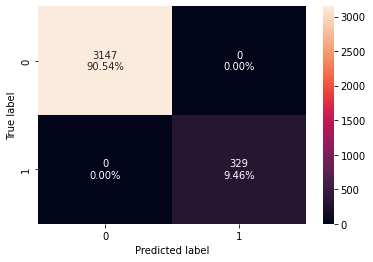

<IPython.core.display.Javascript object>

In [ ]:
#Confusion matrix for best model (post-pruning training)
confusion_matrix_sklearn(best_model, x_train, y_train)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (3,147)

*  **True Positives (TP):** Correctly predicted that they have personal loan (329)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (0 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (0 falsely predict negative Type II error)

In [ ]:
#Score tree (post-pruning - test)
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(best_model, x_test, y_test)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0  0.985235  0.878378   0.970149  0.921986

<IPython.core.display.Javascript object>

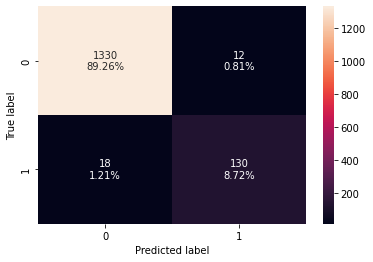

<IPython.core.display.Javascript object>

In [ ]:
#Confusion matrix for best model (post-pruning testing)
confusion_matrix_sklearn(best_model, x_test, y_test)

* **True Negatives (TN):** Correctly predicted that they do not have personal loan (1,330)

*  **True Positives (TP):** Correctly predicted that they have personal loan (130)

* **False Positives (FP):** Incorrectly predicted that they have a personal loan (12 falsely predict positive Type I error)

* **False Negatives (FN):** Incorrectly predicted that they don't have a personal loan (18 falsely predict negative Type II error)

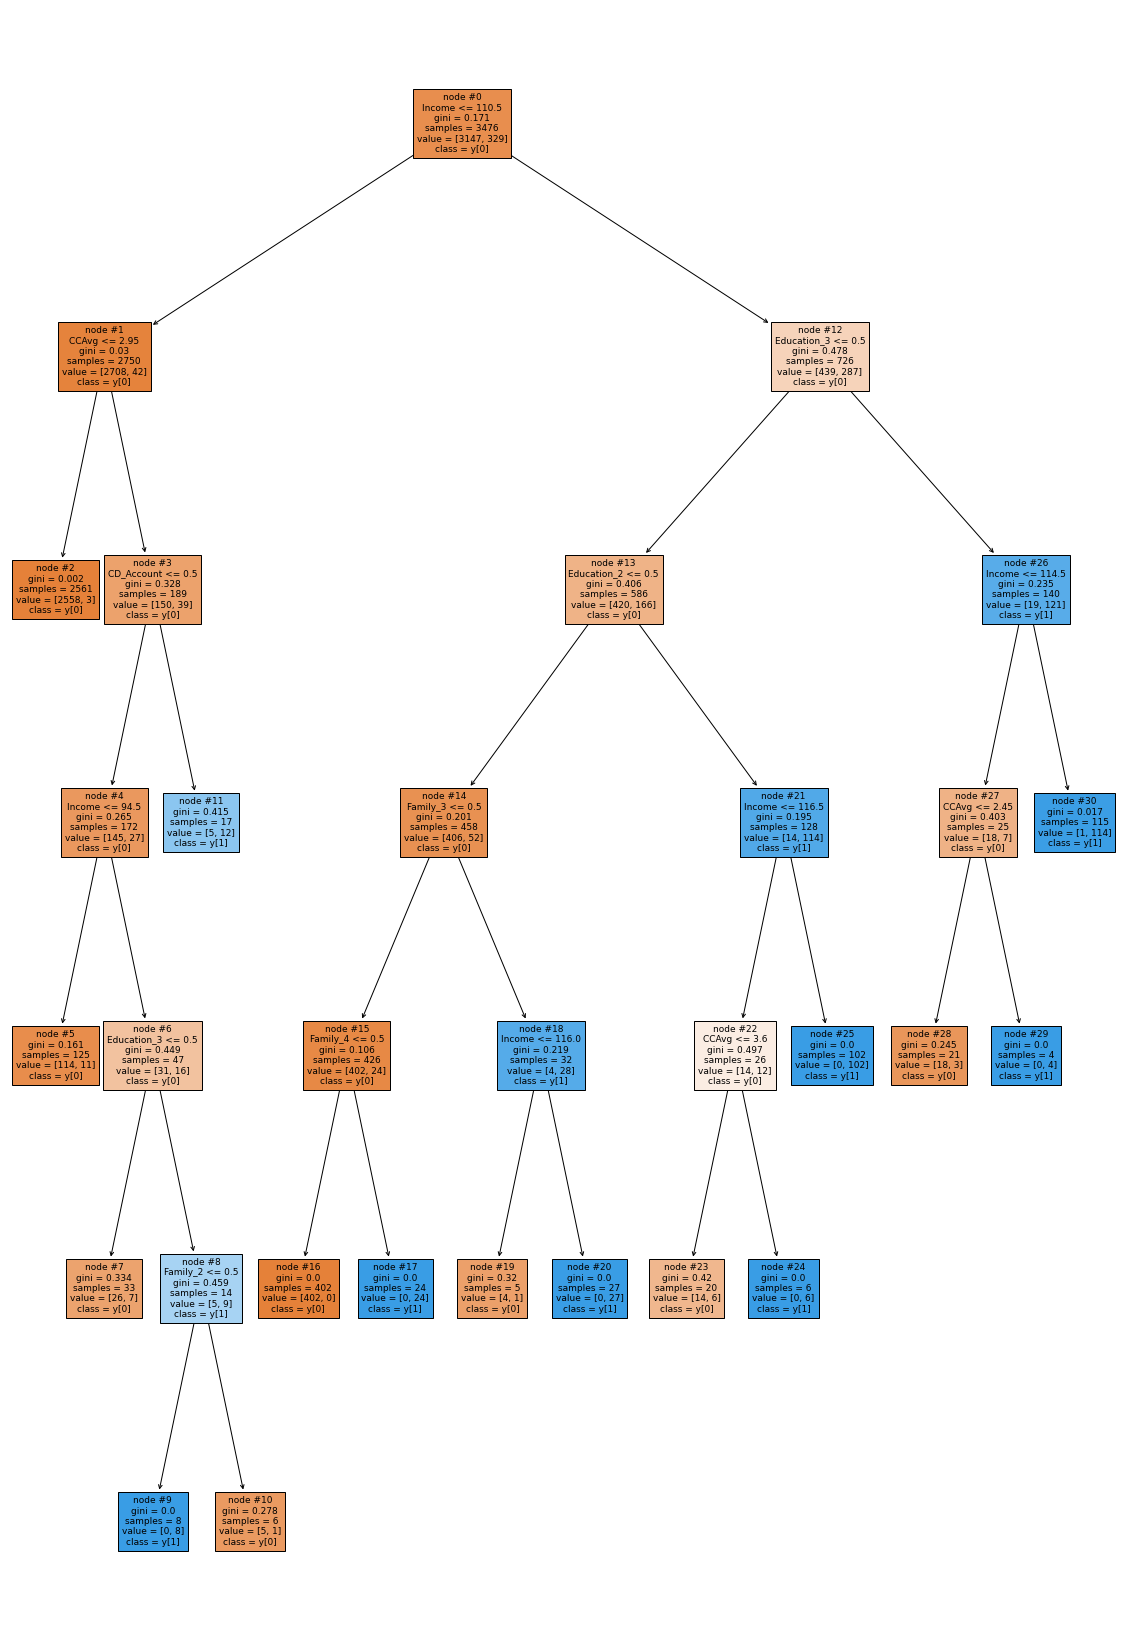

<IPython.core.display.Javascript object>

In [ ]:
#Plot post pruned tree (best model)
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
#Text version of decision tree (best_model)
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2558.00, 3.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 94.50
|   |   |   |   |--- weights: [114.00, 11.00] class: 0
|   |   |   |--- Income >  94.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- weights: [26.00, 7.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Family_2 <= 0.50
|   |   |   |   |   |   |--- weights: [0.00, 8.00] class: 1
|   |   |   |   |   |--- Family_2 >  0.50
|   |   |   |   |   |   |--- weights: [5.00, 1.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [5.00, 12.00] class: 1
|--- Income >  110.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [402.00, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.00, 24.00] class: 1

<IPython.core.display.Javascript object>

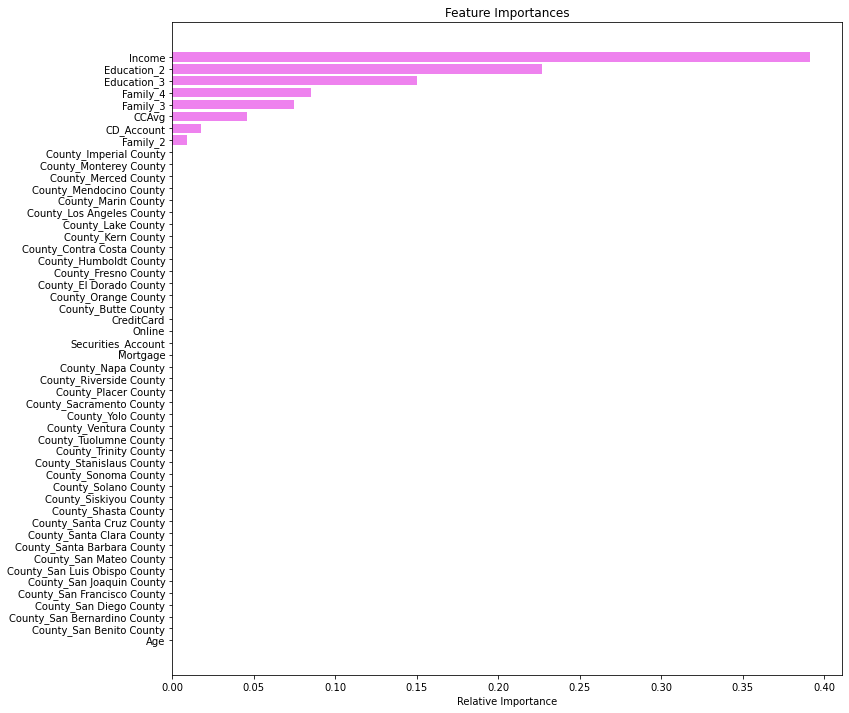

<IPython.core.display.Javascript object>

In [ ]:
#Plot importantce of best model 
importances = best_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features of the gini decision tree model are:

*   Income
*   Education_2
*   Education_3
*   Family_4
*   Family_3

In [ ]:
#Model Comparison (Decision Tree)
comparison_frame = pd.DataFrame({'Model':[ 
                                          'Initial decision tree model Gini', 'Initial decision tree model Entropy','Decision tree with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[ 1, 1, 1, 0.90], 
                                 'Train_Precision':[ 1, 1, 1, 0.98], 'Test_Recall':[0.88,0.87,0.89,0.88], 
                                 'Test_Precision':[0.91, 0.93, 0.92, 0.97]}) 
comparison_frame

Model  Train_Recall  Train_Precision  \
0          Initial decision tree model Gini           1.0             1.00   
1       Initial decision tree model Entropy           1.0             1.00   
2  Decision tree with hyperparameter tuning           1.0             1.00   
3           Decision tree with post-pruning           0.9             0.98   

   Test_Recall  Test_Precision  
0         0.88            0.91  
1         0.87            0.93  
2         0.89            0.92  
3         0.88            0.97

<IPython.core.display.Javascript object>

The decision tree with hyperparameter tuning has the highest recall at 0.89 with a precision score of 0.92, but the decision tree with post-pruning	has a recall score of 0.88 with a precision of 0.97, making this the best model.

### **Conclusion and Recomendations**

<hr>

*   Both decision trees with hyper parameter tuning and cost complexity analysis perfomed really well with a slight advantage in terms of precision with the post pruning model.
*   Income, education, family, and credit card average, were the most important features in determing who would purchase a personal loan.
*   We also ran the model using logistic regression and found that the optinal threshold was 0.12, which returned a recall score of 0.90, but with a lower precision score or just 0.51.
* The ideal market for selling a personal loan is customers with an Income <= 110.50, a family size of 3 or more, and higher education levels. Additionally, customers with CD's and a credit card average of <= 2.95 are more likely to purchase the loans.


